<a href="https://colab.research.google.com/github/ZhengtingHe/DarkSHINE_GAN/blob/main/LOGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
#@title Choose type { run: "auto" }

particle_options = {
    "Inclusive": "/content/drive/MyDrive/Data/dp_ana_Inclusive.hdf5",
    "GMM_ECAL": "/content/drive/MyDrive/Data/dp_ana_GMM_ECAL.hdf5",
    "GMM_Target": "/content/drive/MyDrive/Data/dp_ana_GMM_Target.hdf5",
    "PN_ECAL": "/content/drive/MyDrive/Data/dp_ana_PN_ECAL.hdf5",
    "PN_Target": "/content/drive/MyDrive/Data/dp_ana_PN_Target.hdf5",

    "Inclusive_4e6": "/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/TrainingData/Inclusive_ana_4e6.tfrecord",
    "GMM_ECAL_8e5": "/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/TrainingData/GMM_ECAL_ana_8e5.hdf5",
    "GMM_Targe_8e5": "/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/TrainingData/GMM_Target_ana_8e5.hdf5",
    "PN_ECAL_4e5": "/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/TrainingData/PN_ECAL_ana_4e5.hdf5",
    "PN_Target_4e5": "/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/TrainingData/PN_Target_ana_4e5.hdf5",

    "Inclusive_cut_7GeV": "/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/TrainingData/Inclusive_ana_4e6_cut_at_7GeV.hdf5",
    'Inclusive_larger_than_7GeV' :'/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/TrainingData/Inclusive_ana_4e6_cut_larger_then_7GeV.tfrecord'
}
particle_type = "GMM_Targe_8e5" #@param ['Inclusive', 'GMM_ECAL', 'GMM_Target', 'PN_ECAL', 'PN_Target', 'Inclusive_4e6', 'GMM_ECAL_8e5', 'GMM_Targe_8e5', 'PN_ECAL_4e5', 'PN_Target_4e5', 'Inclusive_cut_7GeV', 'Inclusive_larger_than_7GeV']
particle_label = {particle_type : particle_options[particle_type]}
particle_label

{'GMM_Targe_8e5': '/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/TrainingData/GMM_Target_ana_8e5.hdf5'}

In [152]:
from google.colab import drive
drive.mount("/content/drive")
Model_to_load =None
d_model_to_load = None
aux_model = None
model_save_time = "2021-06-29_14:36:48"
#Model_to_load = "/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/Models/2021-06-30_13:57:40LOGANgenerator_GMM_Targe_8e5.hdf5"
#d_model_to_load = "/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/Models/2021-06-30_13:57:40LOGANdiscriminator_GMM_Targe_8e5.hdf5"
#aux_model = "/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/Models/2021-05-30_00:59:02WGANgenerator_['Inclusive_cut_7GeV'].hdf5"
hdf5_dataset = (list(particle_label.values())[0][-4:] == 'hdf5')
tfrecord_dataset = (list(particle_label.values())[0][-8:] == 'tfrecord')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
particle_label

{'GMM_Targe_8e5': '/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/TrainingData/GMM_Target_ana_8e5.hdf5'}

In [154]:
if tfrecord_dataset:
    print("Using tfrecords format")
if hdf5_dataset:
    print('Using hdf5 format')

Using hdf5 format


# Hyper parameters

In [155]:
#fake_loss_function = 'binary_crossentropy'
fake_loss_function = 'mse'

energy_cut = 1e-3 #MeV
#energy_cut = 0

nb_epochs = 10
batch_size = 600
latent_size = 1024

TRAIN_BUF=34025
BATCH_SIZE=batch_size
TEST_BUF=1024
N_TRAIN_BATCHES =int(TRAIN_BUF/BATCH_SIZE)
N_TEST_BATCHES = int(TEST_BUF/BATCH_SIZE)
generator_extra_step = 3
discriminator_extra_steps = 1

#disc_lr = 2e-6

#disc_lr = 2e-4
#disc_lr = 1e-7
disc_lr = 1e-5
clas_lr = disc_lr
#disc_lr = 5e-4

#gen_lr = 2e-5
gen_lr = 2e-4
#gen_lr = 1e-6
#gen_lr = 1e-4
#gen_lr = 5e-4

adam_beta_1 = 0.5

lambda_E = 1e2

E_factor = 0

lambda_sparsity = 10
ELU_alpha = 1e-5

embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

g_pfx = 'params_generator_epoch_'
d_pfx = 'params_discriminator_epoch_'

# Hyper-parameters form

In [156]:
#@title Hyper-parameters form { run: "auto", vertical-output: true, display-mode: "form" }
disc_lr =  1e-3#@param {type:"number"}
disc_opt = "Adam" #@param ["Adam", "Nadam"]
gen_lr = 1e-3 #@param {type:"number"}
gen_opt = "Nadam" #@param ["Adam", "Nadam"]
energy_cut = 1e-3 #@param {type:"number"}
generator_extra_step =   1#@param {type:"integer"}
discriminator_extra_steps =  1#@param {type:"integer"}
batch_size = 500 #@param {type:"slider", min:100, max:1000, step:100}
final_layer_activation = "softplus" #@param ["relu", "softplus"]
z_alpha =  0.9#@param {type:"number"}
z_beta =  0.1 #@param {type:"number"}
g_network_type = "DownSampling" #@param ["UpSampling", "DownSampling"]
use_latent_optimization = True #@param ["True", "False"] {type:"raw"}
decay_steps = 1000 #@param {type:"slider", min:100, max:2000, step:100}
decay_rate = 0.9 #@param {type:"number"}
end_learning_rate =  1e-6#@param {type:"number"}

# Configure

## Import

In [157]:
from tensorflow import keras
import keras.backend as K
import tensorflow as tf
from keras.models import Model
from keras.optimizers import Adam, Nadam
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
from datetime import datetime
from keras.layers import (Input, Dense, Reshape, Conv2D, LeakyReLU,
                          BatchNormalization, LocallyConnected2D, 
                          Activation, ZeroPadding2D, Lambda, Flatten,
                          Embedding, ELU, Dropout, UpSampling2D, Cropping2D, LayerNormalization, 
                          MultiHeadAttention
                          )
from keras.layers.merge import add, concatenate, multiply
import time
import h5py
from IPython import display
##MBD import
#from keras.engine import InputSpec, Layer
from tensorflow.keras.layers import Layer, InputSpec
from keras import initializers, regularizers, constraints, activations
from keras.layers import Lambda, ZeroPadding2D, LocallyConnected2D
from keras.layers.merge import concatenate, multiply

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import pandas as pd
from tqdm.autonotebook import tqdm

!pip install deepdish
import deepdish as dd

class Dense3D(Layer):

    """
    A 3D, trainable, dense tensor product layer
    """

    def __init__(self, first_dim,
                 last_dim,
                 activation=None,
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 bias_constraint=None,
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(Dense3D, self).__init__(**kwargs)
        self.first_dim = first_dim
        self.last_dim = last_dim
        self.activation = activations.get(activation)
        self.use_bias = use_bias
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)
        self.kernel_constraint = constraints.get(kernel_constraint)
        self.bias_constraint = constraints.get(bias_constraint)
        self.input_spec = InputSpec(min_ndim=2)
        self.supports_masking = True

    def build(self, input_shape):
        assert len(input_shape) >= 2
        input_dim = input_shape[-1]

        self.kernel = self.add_weight(
            shape=(self.first_dim, input_dim, self.last_dim),
            initializer=self.kernel_initializer,
            name='kernel',
            regularizer=self.kernel_regularizer,
            constraint=self.kernel_constraint
        )
        if self.use_bias:
            self.bias = self.add_weight(
                shape=(self.first_dim, self.last_dim),
                initializer=self.bias_initializer,
                name='bias',
                regularizer=self.bias_regularizer,
                constraint=self.bias_constraint
            )
        else:
            self.bias = None
        self.input_spec = InputSpec(min_ndim=2, axes={-1: input_dim})
        self.built = True

    def call(self, inputs, mask=None):
        out = K.reshape(K.dot(inputs, self.kernel), (-1, self.first_dim, self.last_dim))
        if self.use_bias:
            out += self.bias
        return self.activation(out)

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return (input_shape[0], self.first_dim, self.last_dim)

    def get_config(self):
        config = {
            'first_dim': self.first_dim,
            'last_dim': self.last_dim,
            'activation': activations.serialize(self.activation),
            'use_bias': self.use_bias,
            'kernel_initializer': initializers.serialize(self.kernel_initializer),
            'bias_initializer': initializers.serialize(self.bias_initializer),
            'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
            'bias_regularizer': regularizers.serialize(self.bias_regularizer),
            'activity_regularizer': regularizers.serialize(self.activity_regularizer),
            'kernel_constraint': constraints.serialize(self.kernel_constraint),
            'bias_constraint': constraints.serialize(self.bias_constraint)
        }
        base_config = super(Dense, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

class MinibatchStdev(Layer):
    def __init__(self, **kwargs):
        super(MinibatchStdev, self).__init__(**kwargs)

    # calculate the mean standard deviation across each pixel coord
    def call(self, inputs):
        mean = K.mean(inputs, axis=0, keepdims=True)
        mean_sq_diff = K.mean(K.square(inputs - mean), axis=0, keepdims=True) + 1e-8
        mean_pix = K.mean(K.sqrt(mean_sq_diff), keepdims=True)
        shape = K.shape(inputs)
        output = K.tile(mean_pix, [shape[0], shape[1], shape[2], 1])
        return K.concatenate([inputs, output], axis=-1)

    # define the output shape of the layer
    def compute_output_shape(self, input_shape):
        input_shape = list(input_shape)
        input_shape[-1] += 1
        return tuple(input_shape)

class MinibatchVariableStdev(Layer):
    def __init__(self, **kwargs):
        super(MinibatchVariableStdev, self).__init__(**kwargs)

    def call(self, inputs):
        mean = K.mean(inputs, axis=0, keepdims=True)
        mean_sq_diff = K.mean(K.square(inputs - mean), axis=0, keepdims=True) 
        mean_pix = K.mean(K.sqrt(mean_sq_diff), keepdims=True)
        shape = K.shape(inputs)
        mean_output = K.tile(mean, [shape[0], 1])
        output = K.tile(mean_pix, [shape[0], 1])

        return K.concatenate([inputs, mean_output, output], axis=-1)

    # define the output shape of the layer
    def compute_output_shape(self, input_shape):
        input_shape = list(input_shape)
        input_shape[-1] += 2
        return tuple(input_shape)


## Instance

In [158]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Wed Jul 14 14:45:52 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    33W / 250W |  15977MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Read HDF5 file

In [159]:
def read_file(particle, infile):
    #h5file = h5py.File(infile, 'r')
    h5file = dd.io.load(particle_label[particle])
    ECAL_centre = h5file['ECAL_centre']
    Energy = h5file["Energy"]
    sizes = ECAL_centre.shape
    print("There are {} events with {} x {} layout for {}".format(sizes[0], sizes[1], sizes[2],particle))
    y = [particle] * ECAL_centre.shape[0]

    return ECAL_centre, Energy, sizes, y

In [160]:
if hdf5_dataset:
    nb_classes = len(particle_label)
    print("There {} types of particles".format(nb_classes))
    ECAL_centre, Energy, sizes, y = [
    np.concatenate(t) for t in [
                                a for a in zip(*[read_file(p, f) for p, f in particle_label.items()])
                                ]
    ]
    le = LabelEncoder()
    y = le.fit_transform(y)
    print(list(le.classes_))
    print(list(particle_label.keys())[0])
    #ECAL_centre, Energy, y = shuffle(ECAL_centre, Energy, y, random_state=0)
    sizes = ECAL_centre.shape
    sizes = np.shape(ECAL_centre)

    train_images = (ECAL_centre.reshape(sizes[0], 20, 20, 1).astype('float32'))/1000#The scale of eV should be enough 

    #train_images = train_images * (train_images>energy_cut)
    Energy = (Energy.reshape(sizes[0]).astype('float32'))/1000
    print("The shape of tranning data is",train_images.shape)

    train_dataset = (
        tf.data.Dataset.from_tensor_slices({
            'images' :train_images, 
            'energy' :Energy
            })
        .shuffle(train_images.shape[0], reshuffle_each_iteration=True)
        .batch(batch_size)
        #.prefetch(tf.data.AUTOTUNE)
        )

There 1 types of particles
There are 807412 events with 20 x 20 layout for GMM_Targe_8e5
['GMM_Targe_8e5']
GMM_Targe_8e5
The shape of tranning data is (807412, 20, 20, 1)


## Read tfrecord

In [161]:
def parse_tfr_element(element):
    data = {
        'images':tf.io.FixedLenFeature([], tf.string),
        'energy':tf.io.FixedLenFeature([], tf.float32),
        }

    content = tf.io.parse_single_example(element, data)
    raw_image = content['images']
    energy = content['energy']

    feature = tf.io.parse_tensor(raw_image, out_type=tf.float32)
    feature = tf.reshape(feature, shape=[20,20,1])/1000
    energy = tf.reshape(energy, shape=[1])/1000
    return {'images': feature, 
            'energy': energy
            }

def get_dataset_small(filename):
    #create the dataset
    dataset = tf.data.TFRecordDataset(filename)

    #pass every single feature through our mapping function
    dataset = dataset.map(parse_tfr_element,num_parallel_calls=tf.data.AUTOTUNE)

    return dataset

In [162]:
if tfrecord_dataset:
    tfrecord_file = list(particle_label.values())[0]
    train_dataset = get_dataset_small(tfrecord_file)
    test_dataset = get_dataset_small(tfrecord_file)
    sizes = []
    #sizes.append(test_dataset.reduce(np.int64(0), lambda x, _: x + 1).numpy())
    sizes.append(4000000)
    print(sizes)
    for sample in test_dataset.take(1):
        print(sample['images'].shape)
        for i in list(sample['images'].shape):
            sizes.append(i)
        print(sample['energy'].shape)
    print(sizes)
    train_dataset = train_dataset.shuffle(sizes[0], reshuffle_each_iteration=True)
    train_dataset = train_dataset.batch(batch_size)
    train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
    #train_dataset = train_dataset.cache()

# Functions

## Plotting functions

In [163]:
from matplotlib.colors import LogNorm
def plot_2D_image(image, epoch,log=True):    
    fig, ax = plt.subplots(figsize=(5,5))
    if np.max(image)>0:
      energy = ax.imshow(
      image,norm = LogNorm(
          vmin=1e-3,
          vmax=6e3
          )
      )
    else :
      energy = ax.imshow(
      image
      )
    colorbar = fig.colorbar(energy);
    colorbar.set_label(r'Energy (MeV)')
    colorbar.ax.tick_params()
    xticks = range(20)
    yticks = range(20)


    #Plot real image
    if epoch == -2:
        title = 'Real'
    #Plot fake image
    elif epoch == -1:
        title = 'Counterfeit'
    else:
        title = '2D plot for epoch{:03d}'.format(epoch)
    ax.set_title(title)
    if epoch > -1:
        plt.savefig('2D_image_at_epoch_{:03d}.png'.format(epoch))
    plt.xticks(xticks)
    plt.yticks(yticks)
    plt.show()

def plot_3D_image(image, epoch):
    x_gird = np.arange(0, 20, 1)
    y_gird = np.arange(0, 20, 1)
    X_gird, Y_gird = np.meshgrid(x_gird, y_gird)    
    fig = plt.figure(figsize=(13, 7))
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(X_gird, Y_gird, image, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel(r'Energy (MeV)')
    if epoch == -2:
        title = 'Real'
    elif epoch == -1:
        title = 'Counterfeit'
    else:
        title = 'Surface plot for epoch{:04d}'.format(epoch)
    ax.set_title(title)
    fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the energy
    ax.view_init(60, 35)
    if epoch > -1:
        plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))

def plot_loss(loss, x_title='Epoch',fig_width=10,fig_height=10):
    fig=plt.figure(num=1,figsize=(fig_width,fig_height))

    epochs = np.arange(1, len(loss)+1)
    #"d_loss","d_cost", "gp", "g_loss", "g_cost","E_loss"
    d_loss = loss.d_loss.values
    d_cost = loss.d_cost.values
    gp = loss.gp.values
    g_loss = loss.g_loss.values
    g_cost = loss.g_cost.values
    E_loss = loss.E_loss.values


    ax1=fig.add_subplot(221)
    ax1.set_xlabel(x_title)
    ax1.plot(epochs, d_loss, color='blue', marker='o', label='Discriminator loss')
    ax1.plot(epochs, g_loss, color='red', marker='*',label='Generator loss')
    ax1.grid(axis='y')
    ax1.legend()

    ax2 = fig.add_subplot(222)
    ax2.set_xlabel(x_title)
    ax2.plot(epochs, d_cost, color='blue', marker='o', label='Discriminator cost')
    ax2.plot(epochs, g_cost, color='red', marker='*',label='Generator cost')
    ax2.grid(axis='y')
    ax2.legend()

    ax3 = fig.add_subplot(223)
    ax3.set_xlabel(x_title)
    ax3.plot(epochs, E_loss, color='green', marker='D',label='Energy loss')
    ax3.legend()
    ax3.grid(axis='y')
    ax3.set_yscale('log')

    ax4 = fig.add_subplot(224)
    ax4.set_xlabel(x_title)
    ax4.plot(epochs, gp, color='green', marker='D',label='Gradient Panelty')
    ax4.legend()
    ax4.grid(axis='y')

    plt.show()

## OPS functions

In [164]:
def single_layer_energy(x):
    shape = x.shape
    return K.reshape(K.sum(x, axis=list(range(1, len(shape)))), (-1, 1))


def single_layer_energy_output_shape(input_shape):
    shape = list(input_shape)
    assert len(shape) == 4

    return (shape[0], 1)


def calculate_energy(x):
    return Lambda(single_layer_energy, single_layer_energy_output_shape, name='Output_energy')(x)

if final_layer_activation == "relu":
    energy_cut = 0
    
def single_layer_sparsity(x):
    shape = x.shape

    x = K.cast(x>(energy_cut/1000), #Convert MeV to GeV
               K.floatx())
    return K.reshape(K.sum(x, axis=list(range(1, len(shape)))), (-1, 1))/400

def calculate_sparsity(x):
    return Lambda(single_layer_sparsity, single_layer_energy_output_shape, name='sparsity')(x)

def sparsity_level(x):
    _shape = x.shape
    shape = K.shape(x)
    total = K.cast(K.prod(shape[1:]), K.floatx())
    return K.reshape(K.sum(
        K.cast(x > (energy_cut), K.floatx()), axis=list(range(1, len(_shape)))
    ), (-1, 1)) / total

def sparsity_output_shape(input_shape):
    shape = list(input_shape)
    return (shape[0], 1)

def minibatch_discriminator(x):
    """ Computes minibatch discrimination features from input tensor x"""
    diffs = K.expand_dims(x, 3) - \
        K.expand_dims(K.permute_dimensions(x, [1, 2, 0]), 0)
    l1_norm = K.sum(K.abs(diffs), axis=2)
    return K.sum(K.exp(-l1_norm), axis=2)


def minibatch_output_shape(input_shape):
    """ Computes output shape for a minibatch discrimination layer"""
    shape = list(input_shape)
    assert len(shape) == 3  # only valid for 3D tensors
    return tuple(shape[:2])

def scale(x, v):
    return Lambda(lambda _: _ / v)(x)

def energy_loss_function(input_energy, output_energy):
    energy_redundent = output_energy - input_energy
    energy_gap = input_energy - output_energy
    energy_difference = lambda_E * energy_redundent * K.cast(energy_redundent>0, K.floatx()) + E_factor * energy_gap * K.cast(energy_gap>0, K.floatx())
    loss = K.mean(energy_difference, axis=-1)
    assert len(loss) == 1
    return loss

def energy_gap_function(input_energy, output_energy):
    energy_gap = input_energy - output_energy
    energy_difference = energy_gap * K.cast(energy_gap>0, K.floatx())
    return K.mean(energy_difference, axis=-1)

def wasserstein_loss(y_true, y_pred):
    return K.mean(y_true * y_pred)

def gradient_l2_norm(batch_size, real_images, fake_images):
    alpha = tf.random.normal([batch_size, 1, 1, 1], 0.0, 1.0)
    diff = fake_images - real_images
    interpolated = real_images + alpha * diff

    with tf.GradientTape() as gp_tape:
        gp_tape.watch(interpolated)
        # 1. Get the discriminator output for this interpolated image.
        pred = discriminator(interpolated, training=True)

    # 2. Calculate the gradients w.r.t to this interpolated image.
    grads = gp_tape.gradient(pred, [interpolated])[0]
    # 3. Calculate the norm of the gradients.
    norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1, 2, 3]))
    #gp = tf.reduce_mean((norm - 1.0) ** 2)
    return norm
    

def cut_image(image, energy_cut):
    return np.where(image > energy_cut, image, 0)

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = Dense(units, activation=tf.nn.gelu)(x)
        x = Dropout(dropout_rate)(x)
    return x

class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [Dense(ff_dim, activation="relu"), Dense(embed_dim),]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)



# Generator and discriminator

## Discriminator

The following Variables were used a Lambda layer's call (tf.__operators__.add_3), but
are not present in its tracked objects:
  <tf.Variable 'K_features/bias:0' shape=(24, 24) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.__operators__.add_4), but
are not present in its tracked objects:
  <tf.Variable 'K_sparsity/bias:0' shape=(24, 24) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.__operators__.add_5), but
are not present in its tracked objects:
  <tf.Variable 'K_energy/bias:0' shape=(24, 24) dtype=float32>
It is possible that this is intende

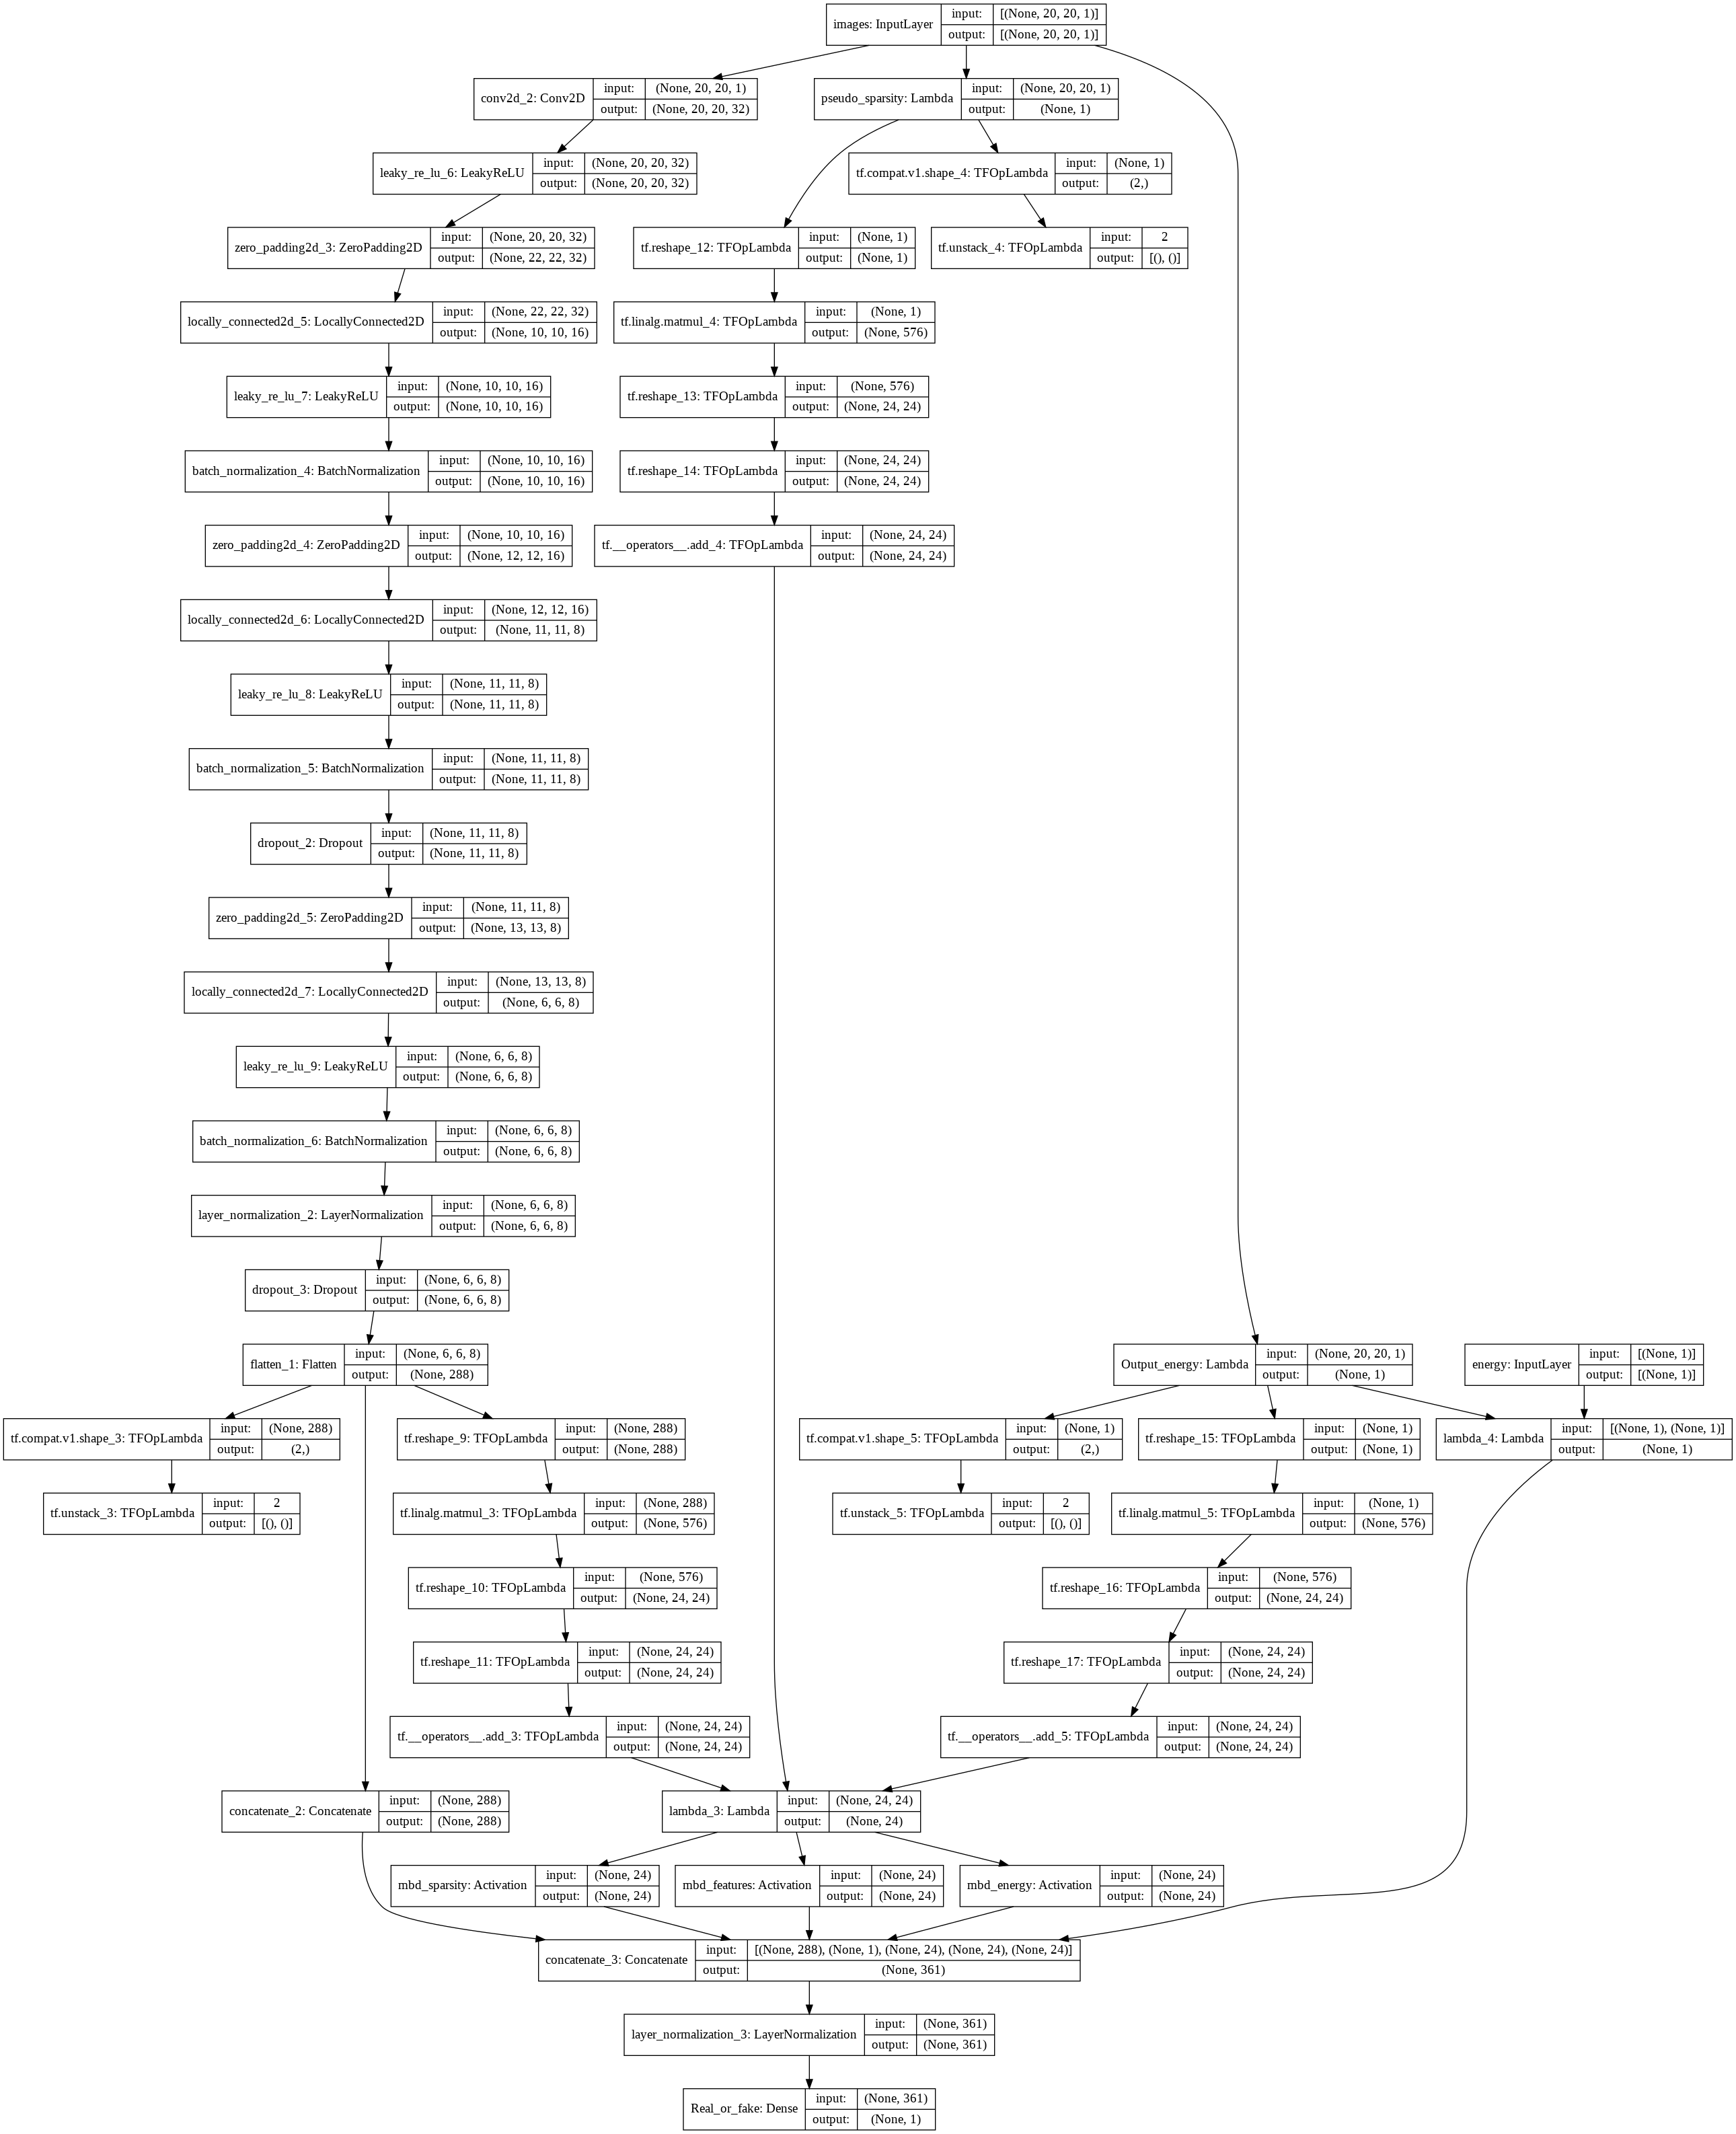

In [165]:
def build_discriminator():

    #Input
    calorimeter = Input(shape=[20,20,1],name='images')
    input_energy = Input(shape=(1,),name='energy')
    output_energy = calculate_energy(calorimeter)
    discriminator_inputs = [calorimeter, input_energy]

    #CNN
    x = Conv2D(32, (2, 2), padding='same')(calorimeter)
    x = LeakyReLU()(x)

    x = ZeroPadding2D((1, 1))(x)
    #x = LocallyConnected2D(16, (3, 3), padding='valid', strides=(1, 2))(x)
    x = LocallyConnected2D(16, (3, 3), padding='valid', strides=(2, 2))(x)
    x = LeakyReLU()(x)
    x = BatchNormalization()(x)

    x = ZeroPadding2D((1, 1))(x)
    x = LocallyConnected2D(8, (2, 2), padding='valid')(x)
    x = LeakyReLU()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    x = ZeroPadding2D((1, 1))(x)
    #x = LocallyConnected2D(8, (2, 2), padding='valid', strides=(1, 2))(x)
    x = LocallyConnected2D(8, (2, 2), padding='valid', strides=(2, 2))(x)
    x = LeakyReLU()(x)
    x = BatchNormalization()(x)
    x = LayerNormalization()(x)
    #x = MinibatchStdev(name='feature_stdev')(x)
    #Maybe it will be helpful to use LN after CNN, so the feature learned by CNN is not sabotoged.
    x = Dropout(0.2)(x)
    #x = MinibatchStdev()(x)
    x = Flatten()(x)
    minibatch_featurizer = Lambda(minibatch_discriminator,
                                      output_shape=minibatch_output_shape)  
    nb_features = 24
    vspace_dim = 24
    K_features = Dense3D(nb_features, vspace_dim, name='K_features')(x)
    mbd_features = Activation('tanh', name='mbd_features')(minibatch_featurizer(K_features))
    

    features = [x]
    #features.append(mbd_features)
    sparsity_detector = Lambda(sparsity_level, sparsity_output_shape, name='pseudo_sparsity')
    empirical_sparsity = sparsity_detector(calorimeter)
    #features.append(empirical_sparsity)
    K_sparsity = Dense3D(nb_features, vspace_dim, name='K_sparsity')(empirical_sparsity)
    mbd_sparsity = Activation('tanh', name='mbd_sparsity')(minibatch_featurizer(K_sparsity))


    
    #sparsity = calculate_sparsity(calorimeter)
    #minibatch_featurizer = Lambda(minibatch_discriminator,
    #                                output_shape=minibatch_output_shape)
    K_energy = Dense3D(nb_features, vspace_dim, name='K_energy')(output_energy)
    #energy_too_big = Lambda(lambda x: 20 * K.cast(x > 8, K.floatx()))(output_energy)
    mbd_energy = Activation('tanh', name='mbd_energy')(minibatch_featurizer(K_energy))
    energy_well = Lambda(lambda x: K.abs(x[0]-x[1]))([output_energy, input_energy])
    #well_too_big = Lambda(lambda x: 10 * K.cast(x > 3, K.floatx()))(energy_well)
    #redundent_energy = Lambda(lambda x: x[0]-x[1])([output_energy, input_energy])
    #positive_redundent = Lambda(lambda x: K.cast(x > 0, K.floatx()))(redundent_energy)

    p = concatenate([
                    concatenate(features),
                    energy_well,
                    mbd_features,
                    mbd_energy,
                    mbd_sparsity,
                    #well_too_big,
                    #redundent_energy,
                    #positive_redundent,
                    #empirical_sparsity,
                    #trans_outputs,
    ])

    p = LayerNormalization()(p)
    #p = Dense(30)(p)
    '''
    ##################################################################################################
    #features = [x]
    sparsity_detector = Lambda(sparsity_level, sparsity_output_shape, name='pseudo_sparsity')
    empirical_sparsity = sparsity_detector(calorimeter)
    empirical_sparsity = MinibatchVariableStdev(name='sparsity_stdev')(empirical_sparsity)
    output_energy_stdev = MinibatchVariableStdev(name='energy_stdev')(output_energy)
    p = concatenate([
         x,
         empirical_sparsity,
         output_energy_stdev,
    ])
    ##################################################################################################
    '''
    fake = Dense(1, name='Real_or_fake')(p)
    #fake = Dense(1, name='Real_or_fake')(x)
    discriminator_outputs = [fake,
                            output_energy,
                            ]

    discriminator = Model(discriminator_inputs, discriminator_outputs, name='Discriminator_model')
    return discriminator

d_model = build_discriminator()
d_model.summary()
keras.utils.plot_model(d_model, show_shapes=True)

## Generator

Model: "Generator_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
z (InputLayer)                  [(None, 1024)]       0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 17424)        17859600    z[0][0]                          
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 22, 22, 36)   0           dense_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 22, 22, 16)   2320        reshape_1[0][0]                  
____________________________________________________________________________________

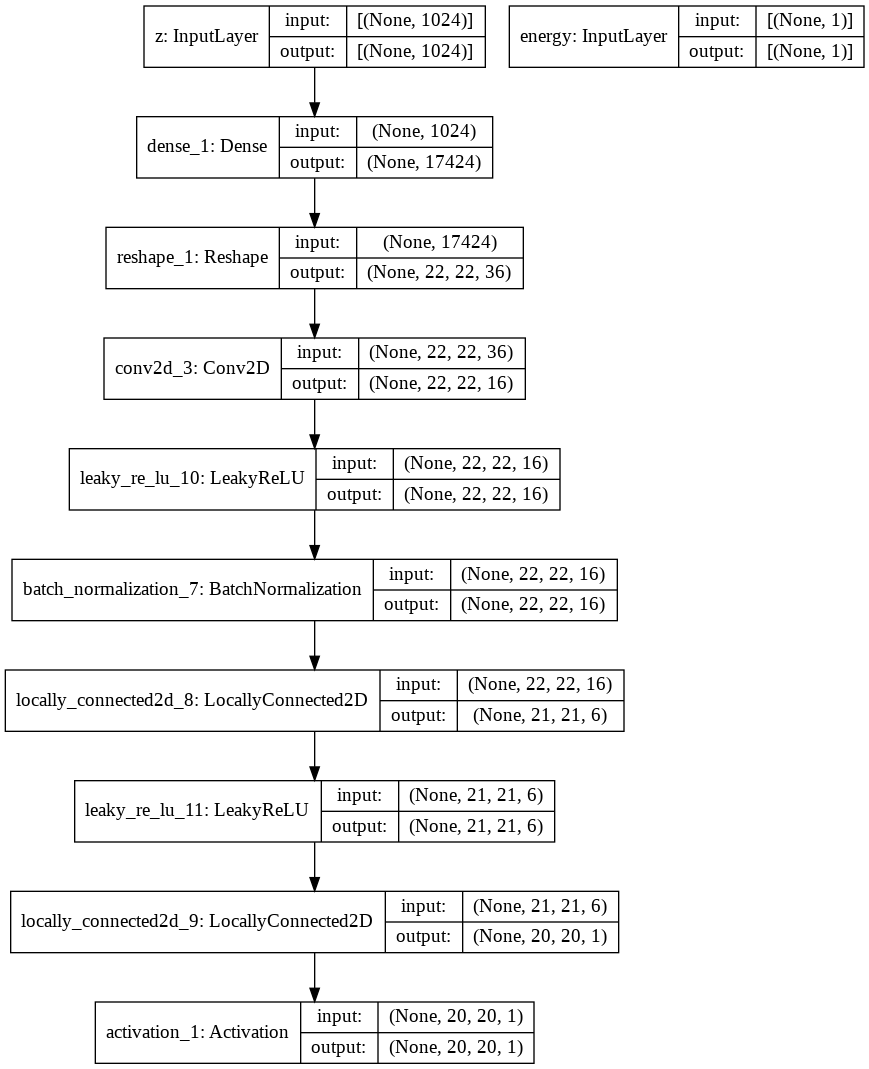

In [166]:
def upsample_block(
    x,
    filters,
    activation,
    kernel_size=(3, 3),
    strides=(1, 1),
    up_size=(2, 2),
    padding="same",
    use_bn=False,
    use_bias=True,
    use_dropout=False,
    drop_value=0.3,
    ):
    x = UpSampling2D(up_size)(x)
    x = Conv2D(
        filters, kernel_size, strides=strides, padding=padding, use_bias=use_bias
        )(x)

    if use_bn:
        x = BatchNormalization()(x)

    if activation:
        x = activation(x)
    if use_dropout:
        x = Dropout(drop_value)(x)
    return x


def build_generator(nb_rows = 20, nb_cols = 20):
    #Input
    latent = Input(shape=(latent_size, ), name='z')
    input_energy = Input(shape=(1, ), dtype='float32', name='energy')
    generator_inputs = [latent, input_energy]

    h = Lambda(lambda x: x[0] * x[1])([latent, input_energy])
    h = latent

    #Network

    if g_network_type == "UpSampling":

        x = Dense(3 * 3 * 256, use_bias=False)(h)
        x = BatchNormalization()(x)
        x = LeakyReLU(0.2)(x)

        x = Reshape((3, 3, 256))(x)
        x = upsample_block(
            x,
            128,
            LeakyReLU(0.2),
            strides=(1, 1),
            use_bias=False,
            use_bn=True,
            padding="same",
            use_dropout=False,
        )
        x = upsample_block(
            x,
            64,
            LeakyReLU(0.2),
            strides=(1, 1),
            use_bias=False,
            use_bn=True,
            padding="same",
            use_dropout=False,
        )
        #x = upsample_block(x, 1, Activation("sigmoid"), strides=(1, 1), use_bias=False, use_bn=True)
        #x = Lambda(lambda x: 8*x)(x)

        x = upsample_block(
            x, 1, Activation(final_layer_activation), strides=(1, 1), use_bias=False, use_bn=True
        )
        image = Cropping2D((2, 2))(x)
    
    else :

        x = Dense((nb_rows + 2) * (nb_cols + 2) * 36)(h)
        x = Reshape((nb_rows + 2, nb_cols + 2, 36))(x)

        x = Conv2D(16, (2, 2), padding='same', kernel_initializer='he_uniform')(x)
        x = LeakyReLU(alpha=0.03)(x)
        x = BatchNormalization()(x)

        x = LocallyConnected2D(6, (2, 2), kernel_initializer='he_uniform')(x)
        x = LeakyReLU(alpha=0.03)(x)

        x = LocallyConnected2D(1, (2, 2), 
                            #use_bias=False,
                            kernel_initializer='glorot_normal'
                            #kernel_initializer=initializers.RandomUniform(minval=-0.1, maxval=-0.01, seed=None)
                            #kernel_initializer=initializers.RandomNormal(mean=-10.0, stddev=0.05, seed=None)
                            )(x)

        #image = Activation("softplus")(x)
        
        image = Activation(final_layer_activation)(x)
        
        #x = Activation("sigmoid")(x)
        #image = Lambda(lambda x: 8*x)(x)
    
    #Map (0,1) to (0,8) GeV
    #image = Lambda(lambda x: 8*x)(x)

    generator = Model(generator_inputs, image, name='Generator_model')

    return generator

g_model = build_generator()
g_model.summary()
keras.utils.plot_model(g_model, show_shapes=True)

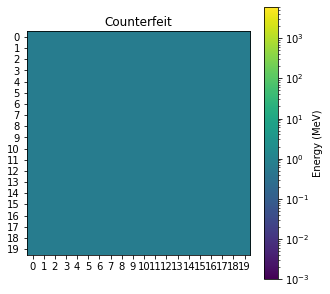

tf.Tensor([[277.25995]], shape=(1, 1), dtype=float32)
[<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.9571944]], dtype=float32)>, <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[277.25995]], dtype=float32)>]


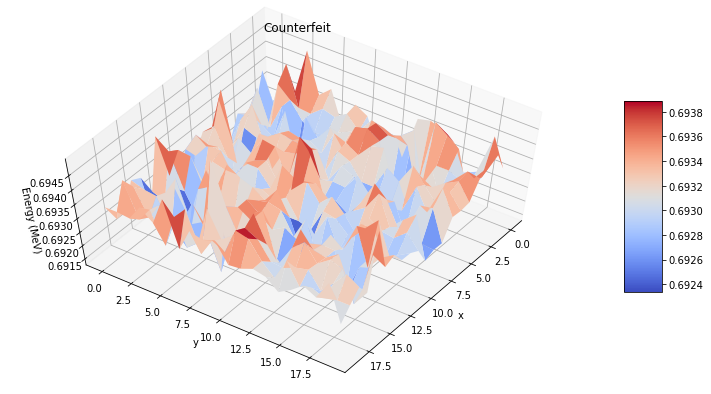

In [167]:
random_latent_vectors = tf.random.normal(shape=(1, latent_size))
real_input_energies = 8
g_inputs = {
    'z':random_latent_vectors, 
    'energy':real_input_energies
    }

#g_inputs = [random_latent_vectors, real_input_energies]
fake_images = g_model(g_inputs)
plot_2D_image(fake_images[0,:,:,0],-1)
plot_3D_image(fake_images[0,:,:,0],-1)
print(single_layer_energy(fake_images))
print(d_model([fake_images, real_input_energies]))

# WGAN model

In [168]:
class WGAN(keras.Model):
    def __init__(
        self,
        discriminator,
        generator,
        latent_dim,
        discriminator_extra_steps=1,
        generator_extra_steps=2,
        gp_weight=10.0,
        E_loss_weight = 10.0,
        #LOGAN
        z_alpha = z_alpha,
        beta = z_beta
    ):
        super(WGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_size
        self.d_steps = discriminator_extra_steps
        self.g_steps = generator_extra_steps
        self.gp_weight = gp_weight
        self.E_loss_weight = E_loss_weight
        #LOGAN
        self.z_alpha = z_alpha
        self.beta = beta


    def compile(self, d_optimizer, g_optimizer, d_loss_fn, g_loss_fn, E_loss_fn):
        super(WGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.d_loss_fn = d_loss_fn
        self.g_loss_fn = g_loss_fn
        self.E_loss_fn = E_loss_fn

    def gradient_penalty(self, batch_size, real_images, fake_images, input_energies):
        """ Calculates the gradient penalty.

        This loss is calculated on an interpolated image
        and added to the discriminator loss.
        """
        # Get the interpolated image
        alpha = tf.random.normal([batch_size, 1, 1, 1], 0.0, 1.0)
        diff = fake_images - real_images
        interpolated = real_images + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            # 1. Get the discriminator output for this interpolated image.
            d_inputs = [interpolated, input_energies]
            pred, _ = self.discriminator(d_inputs, training=True)

        # 2. Calculate the gradients w.r.t to this interpolated image.
        grads = gp_tape.gradient(pred, [interpolated])[0]
        # 3. Calculate the norm of the gradients.
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1, 2, 3]))
        gp = tf.reduce_mean((norm - 1.0) ** 2)
        return gp

    def GD(self, z_gradient):
        delta_z = self.z_alpha * z_gradient
        return delta_z

    def NGD(self, z_gradient):
        norm_sq = tf.reduce_sum(tf.square(z_gradient))
        # delta_z = alpha / (beta + ||g||^2) * g
        delta_z = (self.z_alpha / (self.beta + norm_sq)) * z_gradient
        return delta_z

    def train_step(self, train_data):
        real_images = train_data['images']
        real_input_energies = train_data['energy']

        #if isinstance(real_images, tuple):
        #    real_images = real_images[0]
        

        
        # Get the batch size
        batch_size = tf.shape(real_images)[0]

    
        #random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        random_latent_vectors = tf.random.uniform(shape=(batch_size, self.latent_dim), minval=-1, maxval=1)
        
        #LOGAN
        if use_latent_optimization:
            ################################################
            with tf.GradientTape() as tape:
                
                tape.watch(random_latent_vectors)
                # Generate fake images using the generator
                g_inputs = {
                    'z':random_latent_vectors,
                    'energy':real_input_energies}
                generated_images = self.generator(g_inputs, training=True)
                # Get the discriminator logits for fake images
                d_inputs = {
                    'images':generated_images,
                    'energy':real_input_energies
                }
                
                gen_img_logits, output_energies = self.discriminator(d_inputs, training=True)

            z_gradient = tape.gradient(gen_img_logits, random_latent_vectors)
            

            #GD
            #random_latent_vectors -= self.GD(z_gradient)

            #NGD
            random_latent_vectors = tf.clip_by_value(random_latent_vectors+self.NGD(z_gradient), clip_value_min=-1, clip_value_max=1)
            #random_latent_vectors  =  random_latent_vectors+self.NGD(z_gradient)
            ################################################
        for i in range(self.g_steps):    
            # Train the generator
            # Get the latent vector

            with tf.GradientTape() as tape:
                g_inputs = {
                    'z':random_latent_vectors,
                    'energy':real_input_energies}
                generated_images = self.generator(g_inputs, training=True)
                # Get the discriminator logits for fake images
                d_inputs = {
                    'images':generated_images,
                    'energy':real_input_energies
                }
                
                gen_img_logits, output_energies = self.discriminator(d_inputs, training=True)
                # Calculate the generator loss
                g_cost = self.g_loss_fn(gen_img_logits)
                E_loss = self.E_loss_fn(real_input_energies, output_energies)
        
                g_loss = g_cost + E_loss * self.E_loss_weight


            # Get the gradients w.r.t the generator loss
            gen_gradient = tape.gradient(g_loss, self.generator.trainable_variables)
            # Update the weights of the generator using the generator optimizer
            self.g_optimizer.apply_gradients(
                zip(gen_gradient, self.generator.trainable_variables)
            )

        for i in range(self.d_steps):

            g_inputs = {
                'z':random_latent_vectors, 
                'energy':real_input_energies
                }
            with tf.GradientTape() as tape:
                # Get the logits for the real images
                #d_inputs = [real_images, real_input_energies]
                real_logits, _ = self.discriminator(train_data, training=True)

                # Generate fake images from the latent vector
                fake_images = self.generator(g_inputs, training=True)
                # Get the logits for the fake images
                d_inputs = {
                    'images': fake_images, 
                    'energy': real_input_energies}
                fake_logits, _ = self.discriminator(d_inputs, training=True)
                

                # Calculate the discriminator loss using the fake and real image logits
                d_cost = self.d_loss_fn(real_img=real_logits, fake_img=fake_logits)
                # Calculate the gradient penalty
                gp = self.gradient_penalty(batch_size, real_images, fake_images, real_input_energies)
                # Add the gradient penalty to the original discriminator loss
                d_loss = d_cost + gp * self.gp_weight

            # Get the gradients w.r.t the discriminator loss
            d_gradient = tape.gradient(d_loss, self.discriminator.trainable_variables)
            # Update the weights of the discriminator using the discriminator optimizer
            self.d_optimizer.apply_gradients(
                zip(d_gradient, self.discriminator.trainable_variables)
            )
        
        return {"d_loss": d_loss,"d_cost": d_cost, "gp": gp,"g_loss": g_loss, "g_cost": g_cost,"E_loss": E_loss}

In [169]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self):
        self.Event = np.random.randint(sizes[0])
        #self.seed_noise = np.random.normal(0, 1, (1, latent_size))
        self.seed_noise = np.random.uniform(-1, 1, (1, latent_size))
        #self.seed_energy = np.array(Energy[self.Event]).reshape(1,1)
        self.seed_energy = 8
        self.seed = [self.seed_noise, self.seed_energy]
        self.losses = pd.DataFrame(columns = ["d_loss","d_cost", "gp", "g_loss", "g_cost","E_loss"])
        self.losses_iter = pd.DataFrame(columns = ["d_loss","d_cost", "gp", "g_loss", "g_cost","E_loss"])
        self.batch_num = 0

    
    def on_train_batch_end(self, batch, logs=None):
        self.batch_num += 1
        if self.batch_num%100 == 1:
            generated_image = self.model.generator(self.seed)
            test_generated_image = 1000 * generated_image[0,:,:,0]
            display.clear_output(wait=True)
            plot_loss(self.losses)
            test_generated_image = cut_image(test_generated_image, energy_cut)
            plot_3D_image(test_generated_image, -1)
            plot_2D_image(test_generated_image, -1)
            plot_loss(self.losses_iter,x_title='Iter', fig_width=30, fig_height=10)
            print("The output energy is ",1000 * single_layer_energy(generated_image))
            print(np.max(test_generated_image))
            print("Logs of batch {}: ".format(batch),logs)
            # Get the current learning rate from model's optimizer.
            #lr = float(K.get_value(wgan.d_optimizer.learning_rate))
            #print("The learning rate of discriminator is {}".format(lr))
        self.losses_iter.loc[len(self.losses_iter)] = logs

    

    def on_epoch_end(self, epoch, logs=None):
        self.model.generator.save_weights('{0}{1:03d}.hdf5'.format(g_pfx, len(self.losses)),
                                    overwrite=True)
        self.model.discriminator.save_weights('{0}{1:03d}.hdf5'.format(d_pfx, len(self.losses)),
                                        overwrite=True)
        self.losses.loc[len(self.losses)] = logs
        generated_image = self.model.generator(self.seed)
        test_generated_image = 1000 * generated_image[0,:,:,0]
        display.clear_output(wait=True)
        '''
        if np.min(test_generated_image) != 0 :
            min_non_zero_cell = np.min(test_generated_image[np.nonzero(test_generated_image)])
        else :
            min_non_zero_cell = 0
        print("The min is {}".format(min_non_zero_cell))
        '''
        total_epoch = len(self.losses)
        plot_loss(self.losses)
        #test_generated_image = np.where(test_generated_image > energy_cut, test_generated_image, 0)
        test_generated_image = cut_image(test_generated_image, energy_cut)
        plot_3D_image(test_generated_image, total_epoch)
        plot_2D_image(test_generated_image, total_epoch)
        
        

        print("The output energy is ",1000 * single_layer_energy(generated_image))
        print(np.max(test_generated_image))
        print("Logs of epoch{}: ".format(epoch),logs)
        self.batch_num = 0
        #Reset the loss for iter per batch
        self.losses_iter = pd.DataFrame(columns = ["d_loss","d_cost", "gp", "g_loss", "g_cost","E_loss"])


In [170]:
#generator_optimizer = Adam(2e-4, beta_1=0.5, beta_2=0.9)
generator_optimizer = Nadam()

d_lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=disc_lr,
    decay_steps=decay_steps,
    decay_rate=decay_rate)
d_lr_schedule = keras.optimizers.schedules.PolynomialDecay(initial_learning_rate=disc_lr, decay_steps=decay_steps, end_learning_rate=end_learning_rate, 
                                                           power=0.5,cycle=True, name=None)
discriminator_optimizer = Adam(learning_rate=d_lr_schedule, beta_1=0.5, beta_2=0.9)
#discriminator_optimizer = Nadam(learning_rate=disc_lr)

# Define the loss functions for the discriminator,
# which should be (fake_loss - real_loss).
# We will add the gradient penalty later to this loss function.
def discriminator_loss(real_img, fake_img):
    real_loss = tf.reduce_mean(real_img)
    fake_loss = tf.reduce_mean(fake_img)
    return fake_loss - real_loss

# Define the loss functions for the generator.
def generator_loss(fake_img):
    return -tf.reduce_mean(fake_img)

def energy_loss_function(input_energy, output_energy):
    energy_surplus = output_energy - input_energy
    energy_gap = input_energy - output_energy
    loss =  tf.reduce_mean(tf.where(energy_surplus>0, energy_surplus, 0)) 
    #+ E_factor * tf.reduce_mean(tf.where(energy_gap>0, energy_gap, 0))
    return loss

def energy_loss(input_energy, output_energy):
    return tf.reduce_mean(output_energy - input_energy)

# Instantiate the customer `GANMonitor` Keras callback.
cbk = GANMonitor()

# Instantiate the WGAN model.
wgan = WGAN(
    discriminator=d_model,
    generator=g_model,
    latent_dim=latent_size,
    discriminator_extra_steps=discriminator_extra_steps,
    generator_extra_steps=generator_extra_step,
    E_loss_weight = 10.0
)

# Compile the WGAN model.
wgan.compile(
    d_optimizer=discriminator_optimizer,
    g_optimizer=generator_optimizer,
    g_loss_fn=generator_loss,
    d_loss_fn=discriminator_loss,
    E_loss_fn=energy_loss_function
)

# Train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:91: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


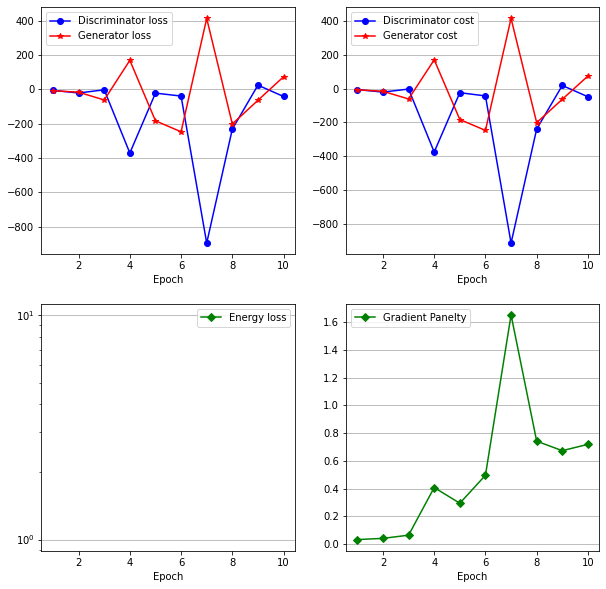

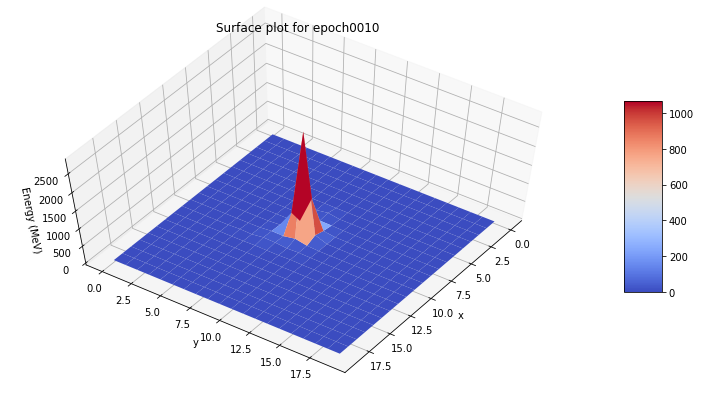

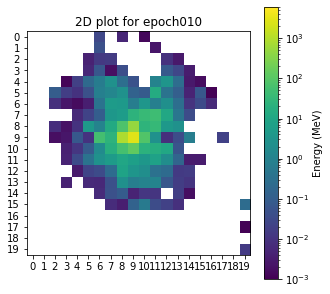

The output energy is  tf.Tensor([[5022.964]], shape=(1, 1), dtype=float32)
2822.2024
Logs of epoch4:  {'d_loss': -41.264076232910156, 'd_cost': -48.447906494140625, 'gp': 0.7183831930160522, 'g_loss': 73.67877960205078, 'g_cost': 73.67877960205078, 'E_loss': 0.0}


In [204]:
if not Model_to_load:
    epochs = 5
    wgan.fit(train_dataset.prefetch(tf.data.AUTOTUNE),
             #batch_size=BATCH_SIZE,
             #Somehow this give a warning
             epochs=epochs, 
             callbacks=[cbk,
                        #tensorboard_callback,
                        #lr_callback
                        ]
            )

In [ ]:
print(wgan.d_optimizer.learning_rate)
print(wgan.g_optimizer.learning_rate)           

<tf.Variable 'Nadam/learning_rate:0' shape=() dtype=float32, numpy=0.001>


In [ ]:
#g_model.load_weights("/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/Models/2021-05-15_16:26:03WGANgenerator_['Inclusive'].hdf5")

# Load weights

In [111]:
if Model_to_load:
    g_model.load_weights(Model_to_load)
    d_model.load_weights(d_model_to_load)
path = "/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/Models/"
d_model.load_weights('params_discriminator_epoch_004.hdf5')
g_model.load_weights('params_generator_epoch_004.hdf5')

# Test model

## Test functions

In [205]:
def heat_map(Input_energy, Output_energy, xbin=70, ybin=70):
    fig = plt.figure(num=1, figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.set_xlim(0,9000)
    ax.set_ylim(0,9000)
    ax.hist2d(Input_energy, Output_energy, bins=(xbin, ybin), cmap=plt.cm.jet, range=((0,9000),(0,9000)))
    ax.set_xlabel('Input energy (MeV)')
    ax.set_ylabel('Layer energy sum (MeV)')
    plt.show()

def plot_hist(image, bin=50):
    plt.hist(image, bins=bin, alpha=0.75)
    plt.xlabel('Energy (MeV)')
    plt.show()


def plot_compare_hist(real_images, fake_images, title,y_log_scale = True, x_log_scale=False):
    colors = matplotlib.cm.gnuplot2(np.linspace(0.2, 0.8, 3))
    plt.figure(figsize=(10, 10))
    plt.hist(real_images, bins=100,histtype='stepfilled', density=True,linewidth=2,
                alpha=0.2, color=colors[0],
                label=r'GEANT4')
    plt.hist(fake_images, bins=100, histtype='step', density=True,linewidth=3,
                alpha=1, color=colors[0],
                label=r'GAN')
    if y_log_scale:
        plt.yscale('log')
    
    if x_log_scale:
        plt.xscale('log')
    plt.legend(loc='upper right', fontsize=20, ncol=2)
    plt.xlabel(title)
    plt.show()

In [206]:
def optimize_latent(random_latent_vectors, generator, discriminator):
    with tf.GradientTape() as tape:
    
        tape.watch(random_latent_vectors)
        # Generate fake images using the generator
        g_inputs = {
            'z':random_latent_vectors,
            'energy':real_input_energies}
        generated_images = generator(g_inputs, training=False)
        # Get the discriminator logits for fake images
        d_inputs = {
            'images':generated_images,
            'energy':real_input_energies
        }
        
        gen_img_logits, output_energies = discriminator(d_inputs, training=False)
    z_gradient = tape.gradient(gen_img_logits, random_latent_vectors)
    delta_z = wgan.NGD(z_gradient)
    random_latent_vectors  =  random_latent_vectors + delta_z
    #random_latent_vectors = tf.clip_by_value(random_latent_vectors+delta_z, clip_value_min=-1, clip_value_max=1)
    return random_latent_vectors

In [207]:
def generate_test_dataset(test_size = 500000, optimize = True):
    #test_noise = np.random.normal(0, 1, (test_size, latent_size))
    #test_noise = tf.random.normal(shape=(test_size, latent_size))
    #test_noise = optimize_latent(test_noise, g_model, d_model)

    if optimize:
        test_batch_size = 500
        multiple = int(test_size/test_batch_size)        
        test_noise = tf.concat([optimize_latent(
            tf.random.uniform(shape=(test_batch_size, latent_size), minval=-1, maxval=1), 
            g_model, d_model
            ) for i in range(multiple)], axis=0)
    else:
        test_noise = tf.random.uniform(shape=(test_size, latent_size), minval=-2, maxval=2)
    #test_sampled_energies = np.random.choice(Energy, test_size)
    test_sampled_energies = np.ones(test_size) * 8
    plot_hist(np.array(test_noise).flatten())
    test_dataset = (
        tf.data.Dataset.from_tensor_slices({
            'z' :test_noise, 
            'energy' :test_sampled_energies
            })
        .batch(batch_size)
        )
    return test_dataset, test_sampled_energies

## Test on 8GeV

### Generate images

In [ ]:
%%time

#Use our model to generate image and convert to the scale of MeV
#test_size_1 = 498197
test_size_1 = 500000
#test_size_1 = 4000000
test_dataset_1, test_sampled_energies_1 = generate_test_dataset(test_size = test_size_1, 
                                                                optimize = use_latent_optimization
                                                                )
test_generated_image_1 = 1000 * g_model.predict(test_dataset_1, verbose=1)#GeV -> MeV

#aux_model = "/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/Models/2021-05-30_00:59:02WGANgenerator_['Inclusive_cut_7GeV'].hdf5"
aux_model = None
if aux_model:
    g_model.load_weights(aux_model)
    #test_size_2 = 5000
    test_size_2 = 1803


    test_dataset_2, test_sampled_energies_2 = generate_test_dataset(test_size = test_size_2)
    test_generated_image_2 = 1000 * g_model.predict(test_dataset_2, verbose=1)#GeV -> MeV
    test_generated_image = np.concatenate((test_generated_image_1, test_generated_image_2), axis=0)
    test_sampled_energies = np.concatenate((test_sampled_energies_1, test_sampled_energies_2), axis=0)
    test_size = test_size_1 + test_size_2
else :
    test_generated_image = test_generated_image_1
    test_sampled_energies = test_sampled_energies_1
    test_size = test_size_1
plot_2D_image(cut_image(test_generated_image[0,:,:,0], energy_cut),-1)
print(test_sampled_energies[0])
#Calculated the energies 


### Check random image

In [ ]:
print(test_generated_image.shape)

In [ ]:
for sample in train_dataset.take(1):
    print(sample['images'].shape)
    print(sample['energy'].shape)
    event_num = np.random.randint(len(sample['images']))
    real_image = 1000 * sample['images'][event_num,:,:,0]
    real_image = cut_image(real_image, 
                       energy_cut
                       )
    plot_2D_image(real_image,-2)
print(sizes)

In [ ]:
event_num = np.random.randint(len(test_generated_image))
fake_image = test_generated_image[event_num,:,:,0]
if hdf5_dataset:
    event_num = np.random.randint(len(ECAL_centre))
    real_image = ECAL_centre[event_num]
    plot_2D_image(real_image,-2)
fake_image = cut_image(fake_image, 
                       1e-3
                       #np.min(np.where(real_image>0,real_image,100))
                       )
plot_2D_image(fake_image, -1)

### Load variables

In [ ]:
if hdf5_dataset:
    hdf5_filenames = list(particle_label.values())[0][:-5]+'_variables.hdf5'

if tfrecord_dataset:
    hdf5_filenames = list(particle_label.values())[0][:-9]+'_variables.hdf5'

print(hdf5_filenames)

In [ ]:
variable_data = dd.io.load(hdf5_filenames)

In [ ]:
x = 25*np.arange(-9.5,10,1)
y = x
x_coor,y_coor = np.meshgrid(x,y,indexing = 'xy')
x_coor = x_coor.reshape(-1)
y_coor = y_coor.reshape(-1)

def get_total_E(image):
    return np.sum(image)

def get_E_max(image):
    return np.max(image)

def get_frac_n(image, n):
    top_n = np.sort(image.flatten())[::-1][:n]
    return np.sum(top_n)/np.sum(image)

def get_x_moment(image):
    return np.average(x_coor,weights=image.reshape(image.size))

def get_y_moment(image):
    return np.average(y_coor,weights=image.reshape(image.size))

def get_x_sq(image):
    return np.average(x_coor**2,weights=image.reshape(image.size))

def get_y_sq(image):
    return np.average(y_coor**2,weights=image.reshape(image.size))

def get_r(image):
    return np.average(np.sqrt(x_coor**2 + y_coor**2),weights=image.reshape(image.size))

def get_sparsity(image, cut_value):
    return np.average(np.where(image>cut_value, 1, 0))

functions_of_variables = {
    'total energy': get_total_E,
    'x_moment': get_x_moment,
    'y_moment': get_y_moment,
    'x_sq': get_x_sq,
    'y_sq': get_y_sq,
    'r': get_r,
    'E_max': get_E_max,
    'pseudo-sparsity': lambda image: get_sparsity(image, energy_cut),
    'frac_50': lambda image: get_frac_n(image, 50),
    'frac_100': lambda image: get_frac_n(image, 100),
    'frac_200': lambda image: get_frac_n(image, 200)
}

In [ ]:
def get_variables(func, images):
    return np.fromiter((func(x) for x in images), images.dtype)

def variable_dict(images, **functions):
    variables = {}
    for key, func in functions.items():
        variables[key] = get_variables(func, images)
    return variables

In [ ]:
generated_variables = variable_dict(test_generated_image, **functions_of_variables)

In [ ]:
print(generated_variables.keys())
print(variable_data.keys())
print(type(variable_data))
print(type(generated_variables))

In [ ]:
print(test_generated_image.shape)

In [ ]:
selected_variables = ['total energy', 'x_moment', 'y_moment', 'x_sq', 'y_sq', 'r', 'E_max']
#selected_variables = generated_variables.keys()
target = pd.DataFrame(data={key:variable_data[key] for key in selected_variables})
original = pd.DataFrame(data={key:generated_variables[key] for key in selected_variables})
for col in target.columns:
    qualified = (original[col] <= target[col].max()) & (original[col] >= target[col].min())
    original = original[qualified]
    test_generated_image = test_generated_image[qualified]

print(target.columns)
print(original.columns)
print(original.shape)
print(test_generated_image.shape)

### Install required package

In [ ]:
!pip install hep_ml

### Function to plot

In [ ]:
from hep_ml import reweight
from hep_ml.metrics_utils import ks_2samp_weighted
columns = original.columns
KS_data = pd.DataFrame(columns=columns)
def draw_distributions(original, target, new_original_weights, y_log_scale= True, x_log_scale=False):
    KS_values = {}
    colors = matplotlib.cm.gnuplot2(np.linspace(0.2, 0.8, 3))
    num_row = np.ceil(len(columns)/2)
    plt.figure(figsize=[20, 7*num_row])
    for id, column in enumerate(columns, 1):
        xlim = np.percentile(np.hstack([target[column]]), [0.01, 99.99])
        plt.subplot(num_row, 2, id)

        plt.hist(target[column], bins=100, histtype='stepfilled',
                 density=True,
                 linewidth=1,
                 range=(np.min(target[column]), np.max(target[column])),
                 alpha=0.2, color=colors[0],
                 label=r'DSS')
        plt.hist(original[column], weights=new_original_weights, bins=100, histtype='step',
                 density=True,
                 linewidth=2,
                 range=(np.min(target[column]), np.max(target[column])),
                 alpha=1, color=colors[0],
                 label=r'GAN')
        
        if y_log_scale:
            plt.yscale('log')
    
        if x_log_scale:
            plt.xscale('log')
        plt.legend(loc='upper right', fontsize=20, ncol=2)
        plt.title(column)
        print('KS over ', column, ' = ', ks_2samp_weighted(original[column], target[column],
                                                           weights1=new_original_weights, weights2=np.ones(len(target), dtype=float)))
        KS_values[column] = ks_2samp_weighted(original[column], target[column],
                                              weights1=new_original_weights, weights2=np.ones(len(target), dtype=float))
    return KS_values

### Original Distribution

In [ ]:
original_weights = np.ones(len(original))
KS_data.loc['original'] = draw_distributions(original, target, original_weights)
_ = draw_distributions(original, target, original_weights, y_log_scale=False)
print(np.sum([i for i in _.values()]))

# Reweighter

### Weights dataframa

In [190]:
weights_data = pd.DataFrame()

### Gradient Boosted Reweighter

In [191]:
reweighter = reweight.GBReweighter(n_estimators=50, learning_rate=0.1, max_depth=3, min_samples_leaf=1000,
                                   gb_args={'subsample': 0.4})

In [192]:
reweighter.fit(original, target)

GBReweighter(gb_args={'subsample': 0.4}, learning_rate=0.1,
             loss_regularization=5.0, max_depth=3, min_samples_leaf=1000,
             n_estimators=50)

In [193]:
gb_weights_test = reweighter.predict_weights(original)

KS over  total energy  =  0.027339358239309663
KS over  x_moment  =  0.047784056727799396
KS over  y_moment  =  0.020701724560938772
KS over  x_sq  =  0.04643540642262822
KS over  y_sq  =  0.031790978720184326
KS over  r  =  0.01836743431718313
KS over  E_max  =  0.03499804887109159


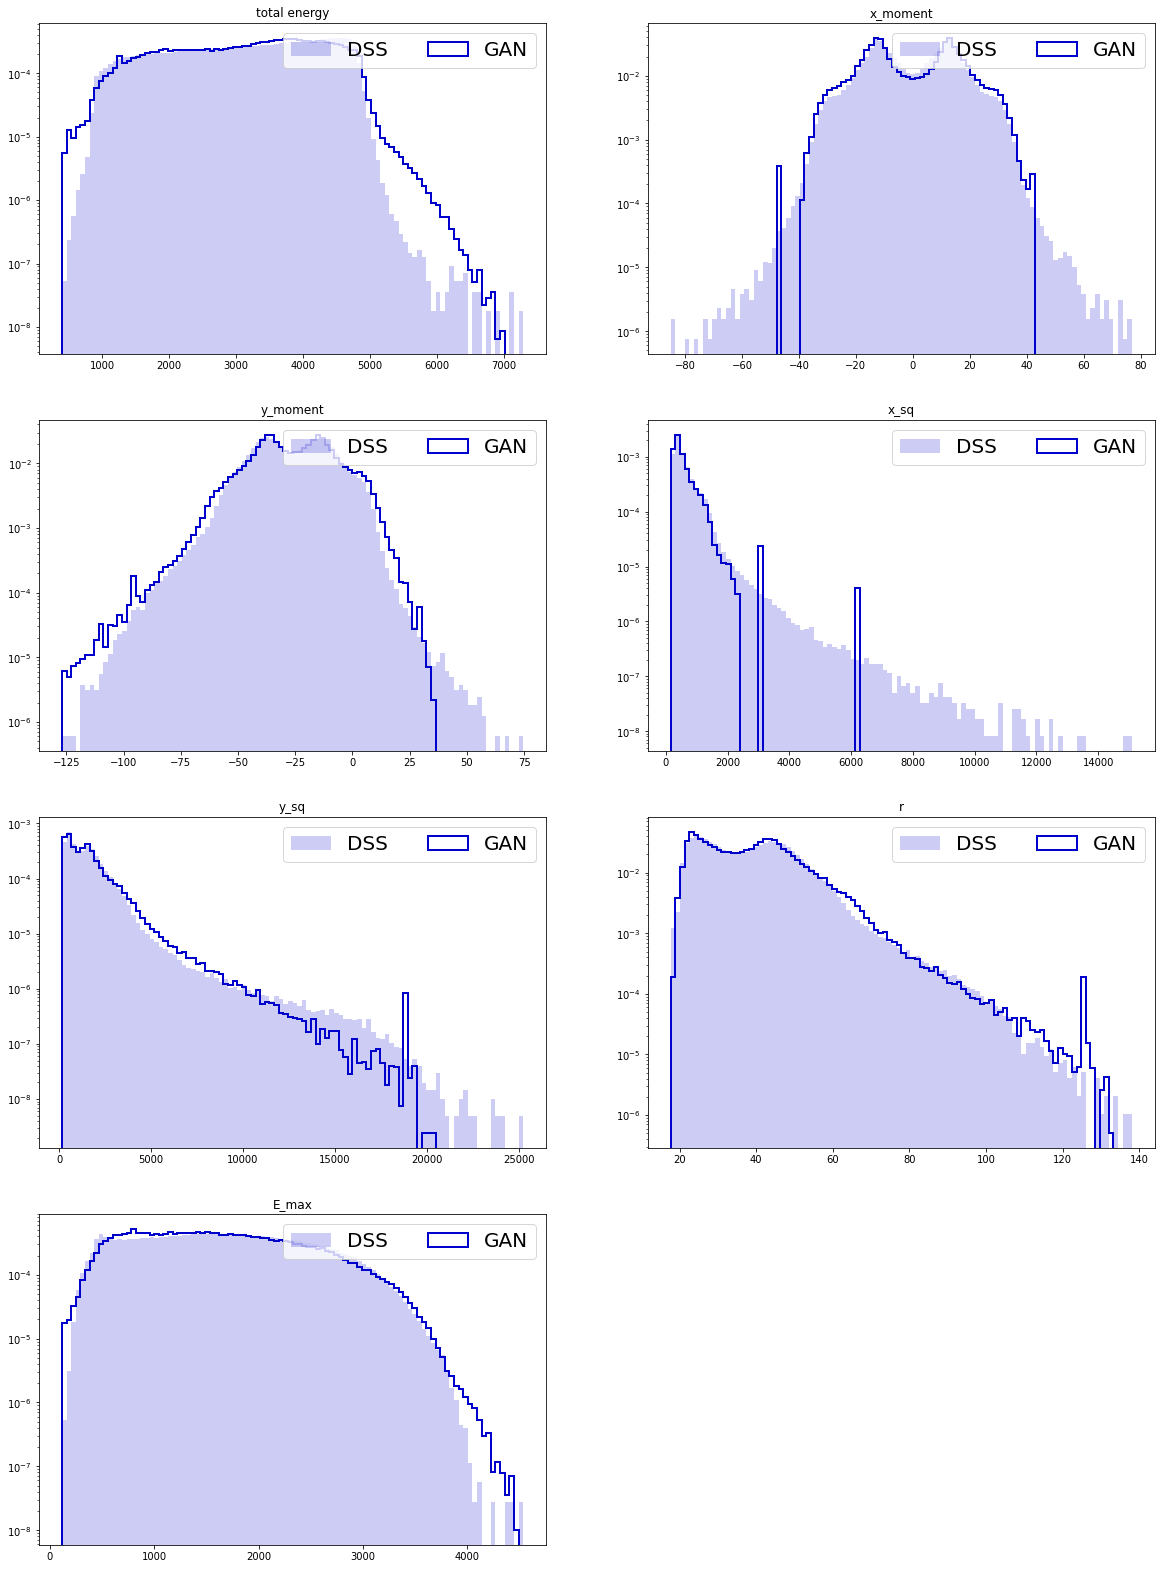

In [194]:
gb_weights_test = reweighter.predict_weights(original)
# validate reweighting rule on the test part comparing 1d projections
KS_data.loc['Gradient Boosted Reweighter'] = draw_distributions(original, target, gb_weights_test)

KS over  total energy  =  0.027339358239309663
KS over  x_moment  =  0.047784056727799396
KS over  y_moment  =  0.020701724560938772
KS over  x_sq  =  0.04643540642262822
KS over  y_sq  =  0.031790978720184326
KS over  r  =  0.01836743431718313
KS over  E_max  =  0.03499804887109159


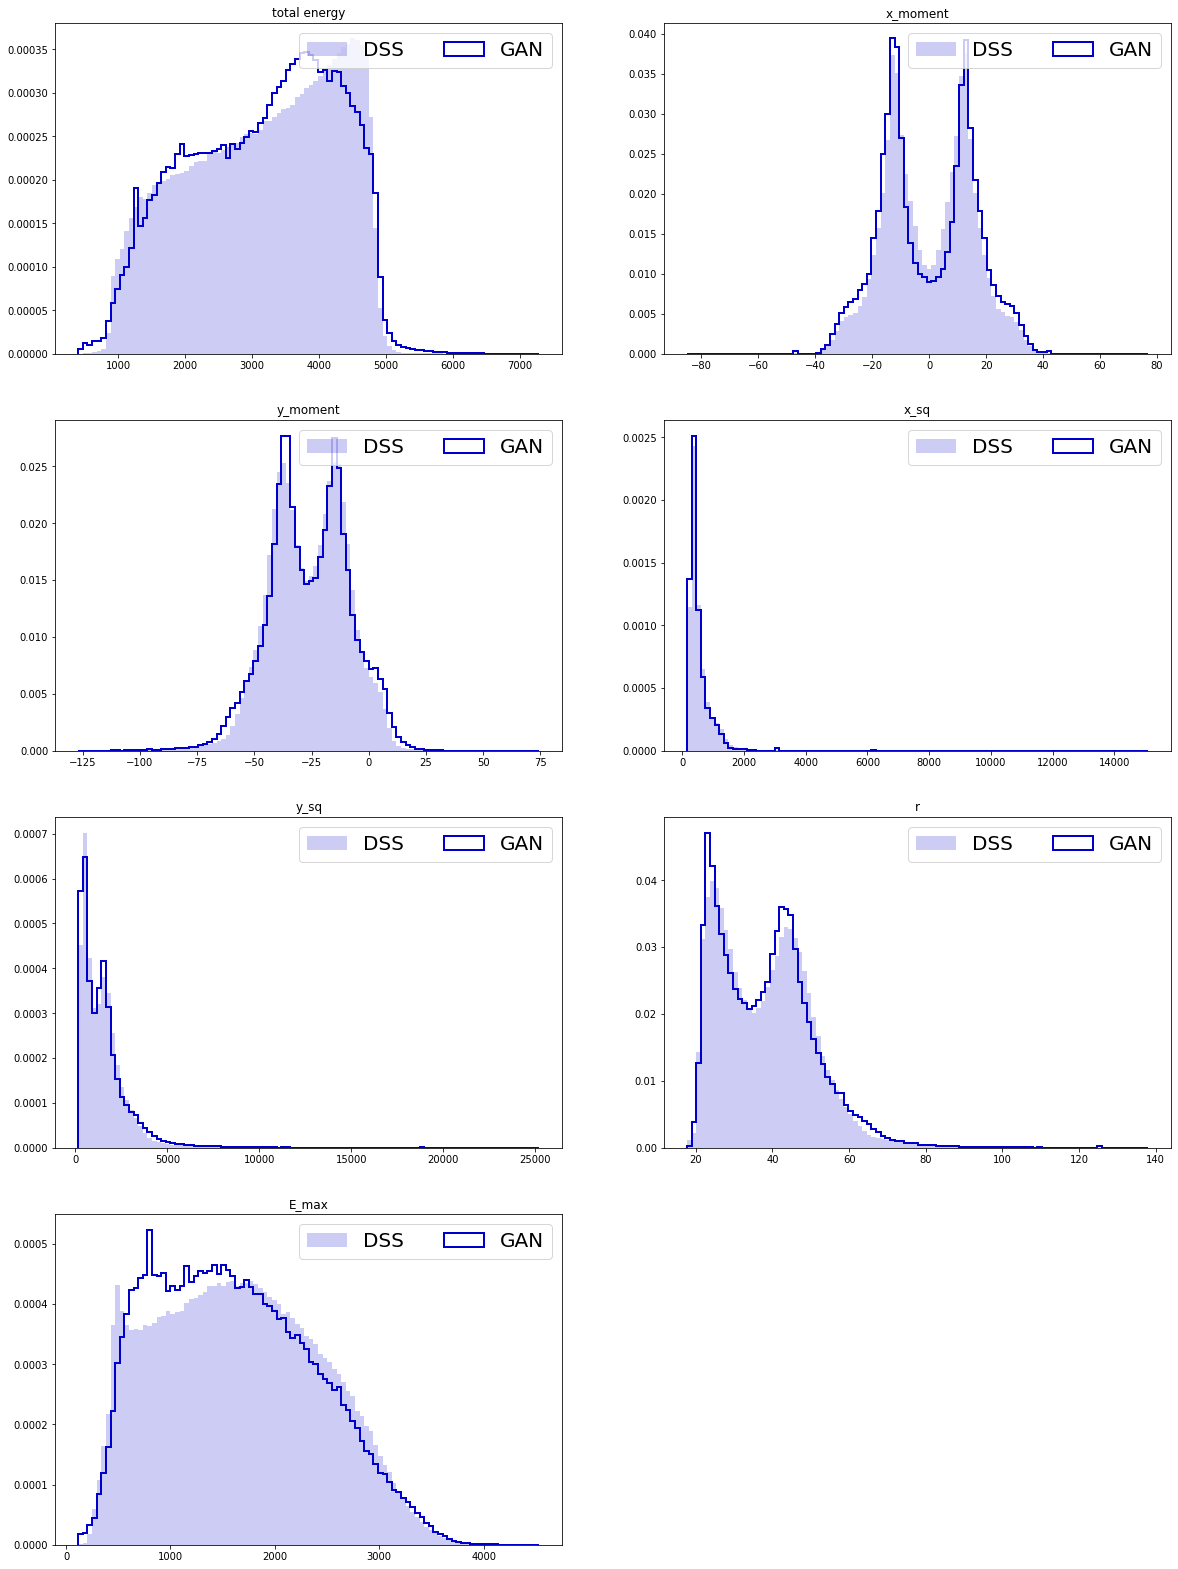

In [195]:
_ = draw_distributions(original, target, gb_weights_test, y_log_scale=False)

In [196]:
weights_data['GB_weights'] = gb_weights_test

In [197]:
#plot_2D_image(np.average(test_generated_image, weights=gb_weights_test,axis=0)[:,:,0],-1)
#plot_2D_image(np.mean(ECAL_centre,axis=0),-2)

### Bins-based reweighting in n dimensions

KS over  total energy  =  0.005341029305741984
KS over  x_moment  =  0.048603108897473324
KS over  y_moment  =  0.020857960951199628
KS over  x_sq  =  0.25308296434498223
KS over  y_sq  =  0.06788599286055658
KS over  r  =  0.07779532501384043
KS over  E_max  =  0.03226312622689322


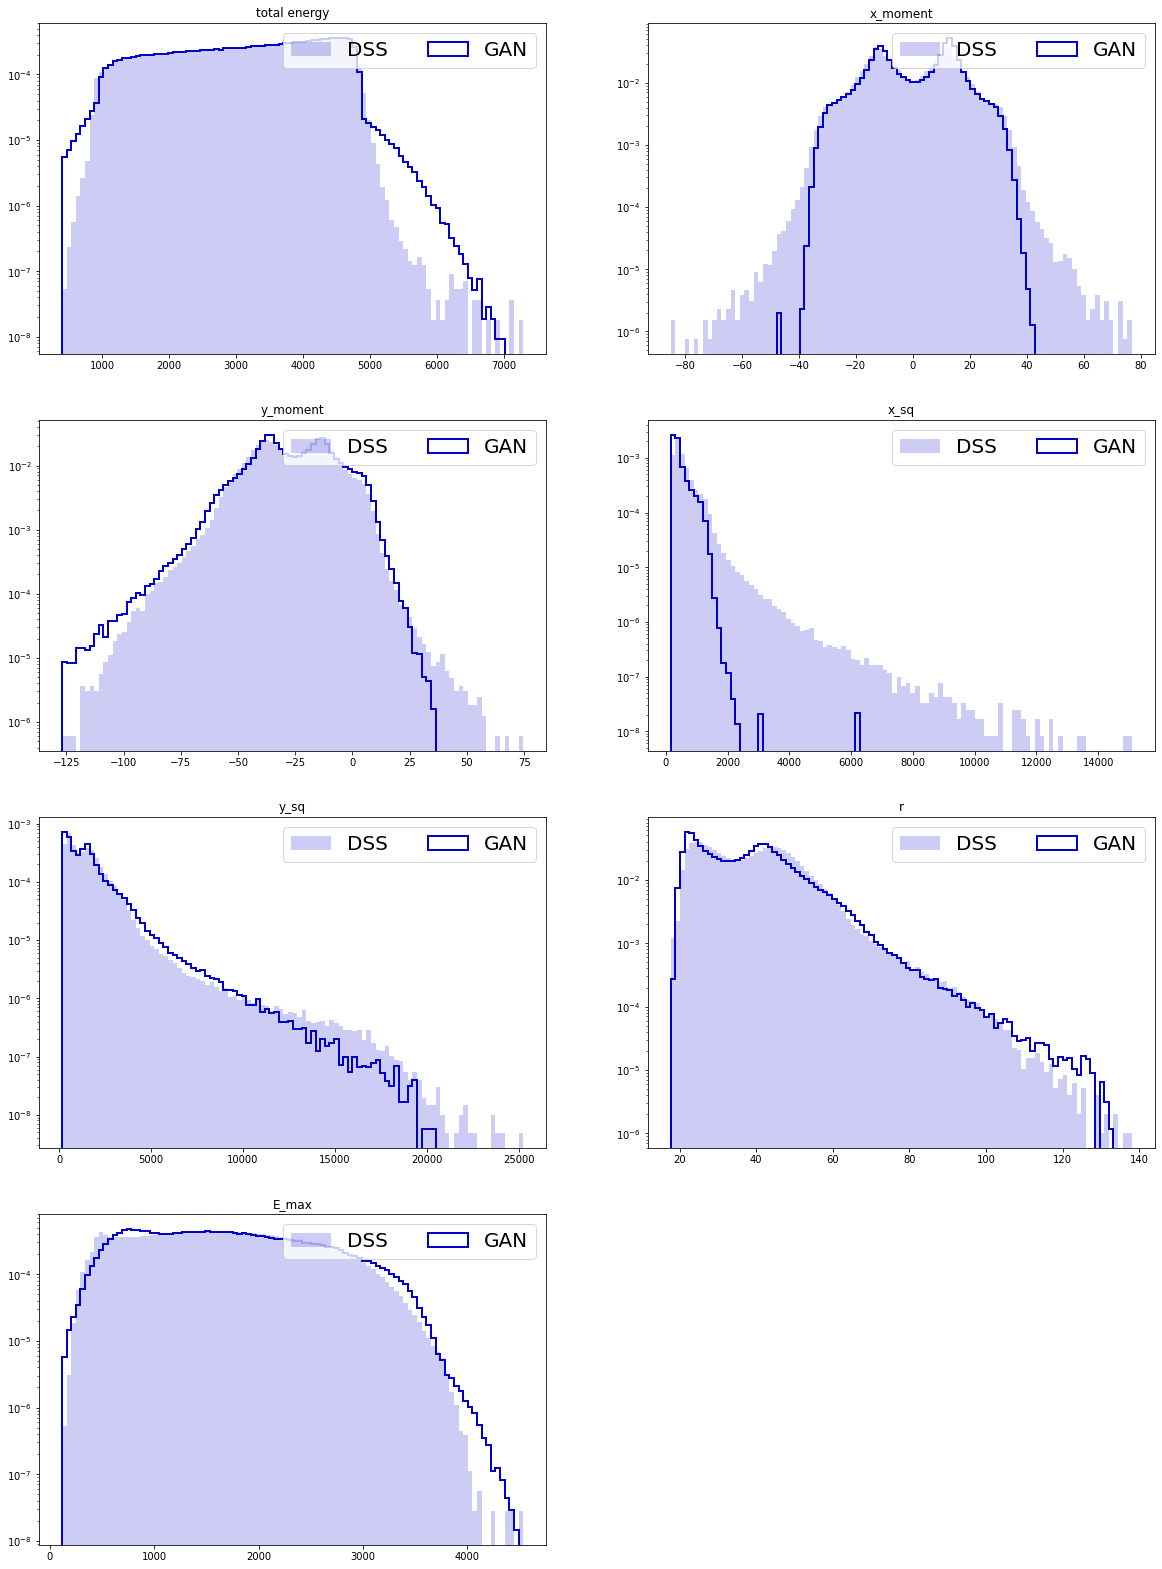

In [198]:
bins_reweighter = reweight.BinsReweighter(n_bins=100, n_neighs=0)
bins_reweighter.fit(original[['total energy']], target[['total energy']])

bins_weights_test = bins_reweighter.predict_weights(original[['total energy']])
# validate reweighting rule on the test part comparing 1d projections
KS_data.loc['Bins-based: total energy'] = draw_distributions(original, target, bins_weights_test)
#plot_2D_image(np.average(test_generated_image, weights=bins_weights_test,axis=0)[:,:,0],-1)
#plot_2D_image(np.mean(ECAL_centre,axis=0),-2)
weights_data['energy_bin_weights'] = bins_weights_test

KS over  total energy  =  0.00563118162321008
KS over  x_moment  =  0.12780012695095466
KS over  y_moment  =  0.03266283709178708
KS over  x_sq  =  0.013585925520671172
KS over  y_sq  =  0.05224439518630128
KS over  r  =  0.028649189558848764
KS over  E_max  =  0.02371234237287506


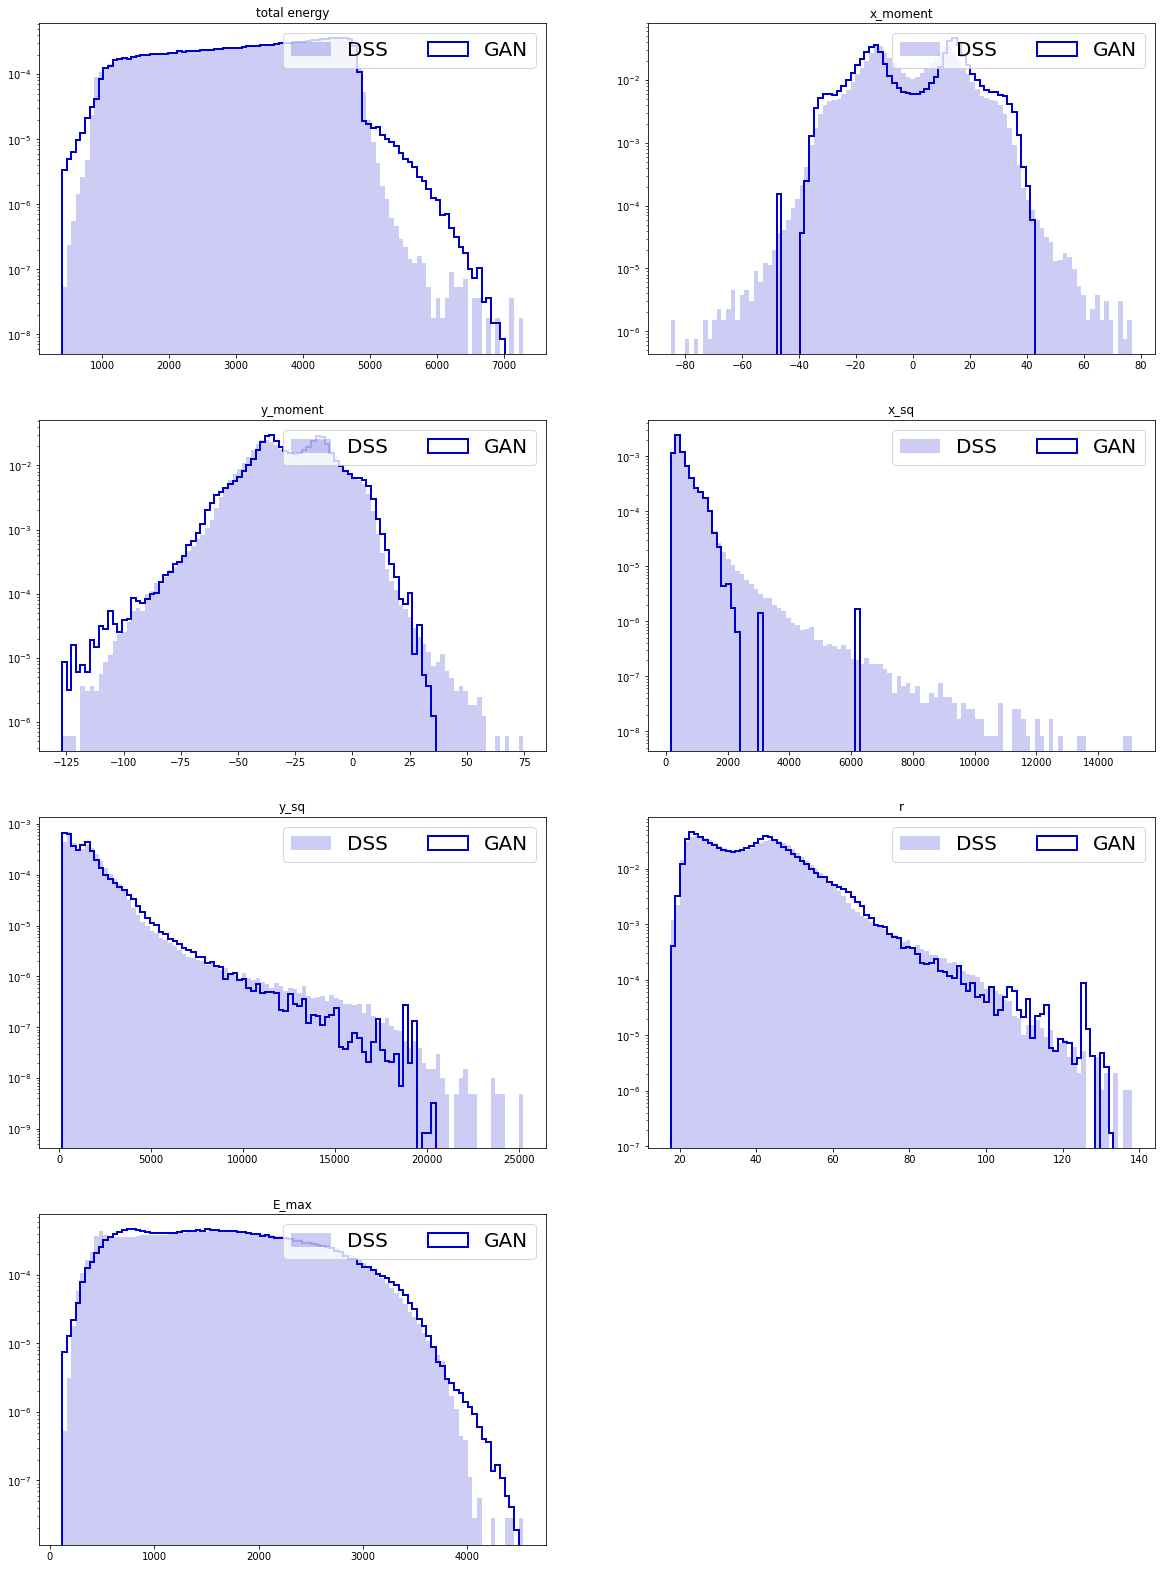

In [199]:
bins_reweighter = reweight.BinsReweighter(n_bins=100, n_neighs=0)
bins_reweighter.fit(original[['total energy','x_sq']], target[['total energy','x_sq']])

bins_weights_test = bins_reweighter.predict_weights(original[['total energy','x_sq']])
KS_data.loc['Bins-based: total energy and x_sq'] = draw_distributions(original, target, bins_weights_test)
#plot_2D_image(np.average(test_generated_image, weights=bins_weights_test,axis=0)[:,:,0],-1)
#plot_2D_image(np.mean(ECAL_centre,axis=0),-2)
weights_data['energy&x_sq_bin_weights'] = bins_weights_test

### Folding reweighter

KFold prediction using folds column
KS over  total energy  =  0.9503150803145737
KS over  x_moment  =  0.7175270434461536
KS over  y_moment  =  0.8365003546768239
KS over  x_sq  =  0.9964054928425186
KS over  y_sq  =  0.6980004811916847
KS over  r  =  0.6905751495842121
KS over  E_max  =  0.822426982948601


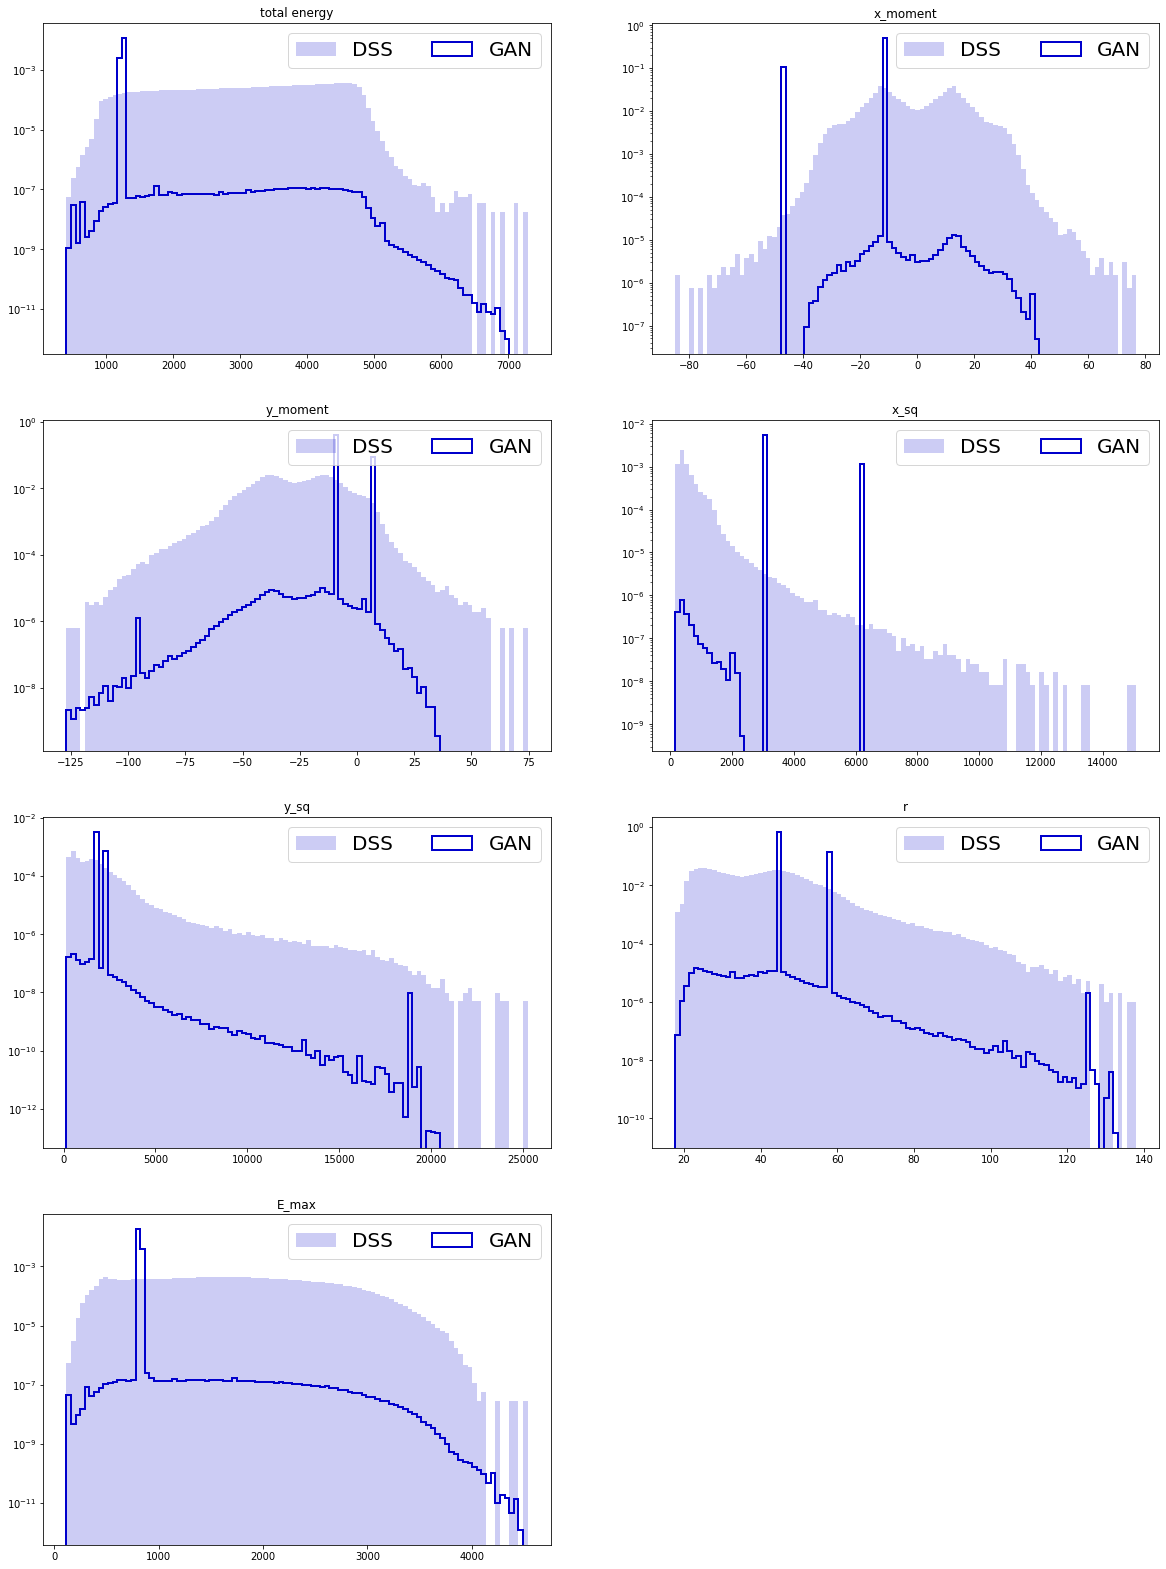

In [200]:
reweighter_base = reweight.GBReweighter(n_estimators=70,
                                        learning_rate=0.1, max_depth=4, min_samples_leaf=1000,
                                        gb_args={'subsample': 0.4})
reweighter = reweight.FoldingReweighter(reweighter_base, n_folds=2)
# it is not needed divide data into train/test parts; rewighter can be train on the whole samples
reweighter.fit(original, target)

# predict method provides unbiased weights prediction for the whole sample
# folding reweighter contains two reweighters, each is trained on one half of samples
# during predictions each reweighter predicts another half of samples not used in training
folding_weights = reweighter.predict_weights(original)

KS_data.loc['Folding reweighter'] = draw_distributions(original, target, folding_weights)
#plot_2D_image(np.average(test_generated_image, weights=folding_weights,axis=0)[:,:,0],-1)
#plot_2D_image(np.mean(ECAL_centre,axis=0),-2)

KS over  total energy  =  0.9503150803145737
KS over  x_moment  =  0.7175270434461536
KS over  y_moment  =  0.8365003546768239
KS over  x_sq  =  0.9964054928425186
KS over  y_sq  =  0.6980004811916847
KS over  r  =  0.6905751495842121
KS over  E_max  =  0.822426982948601


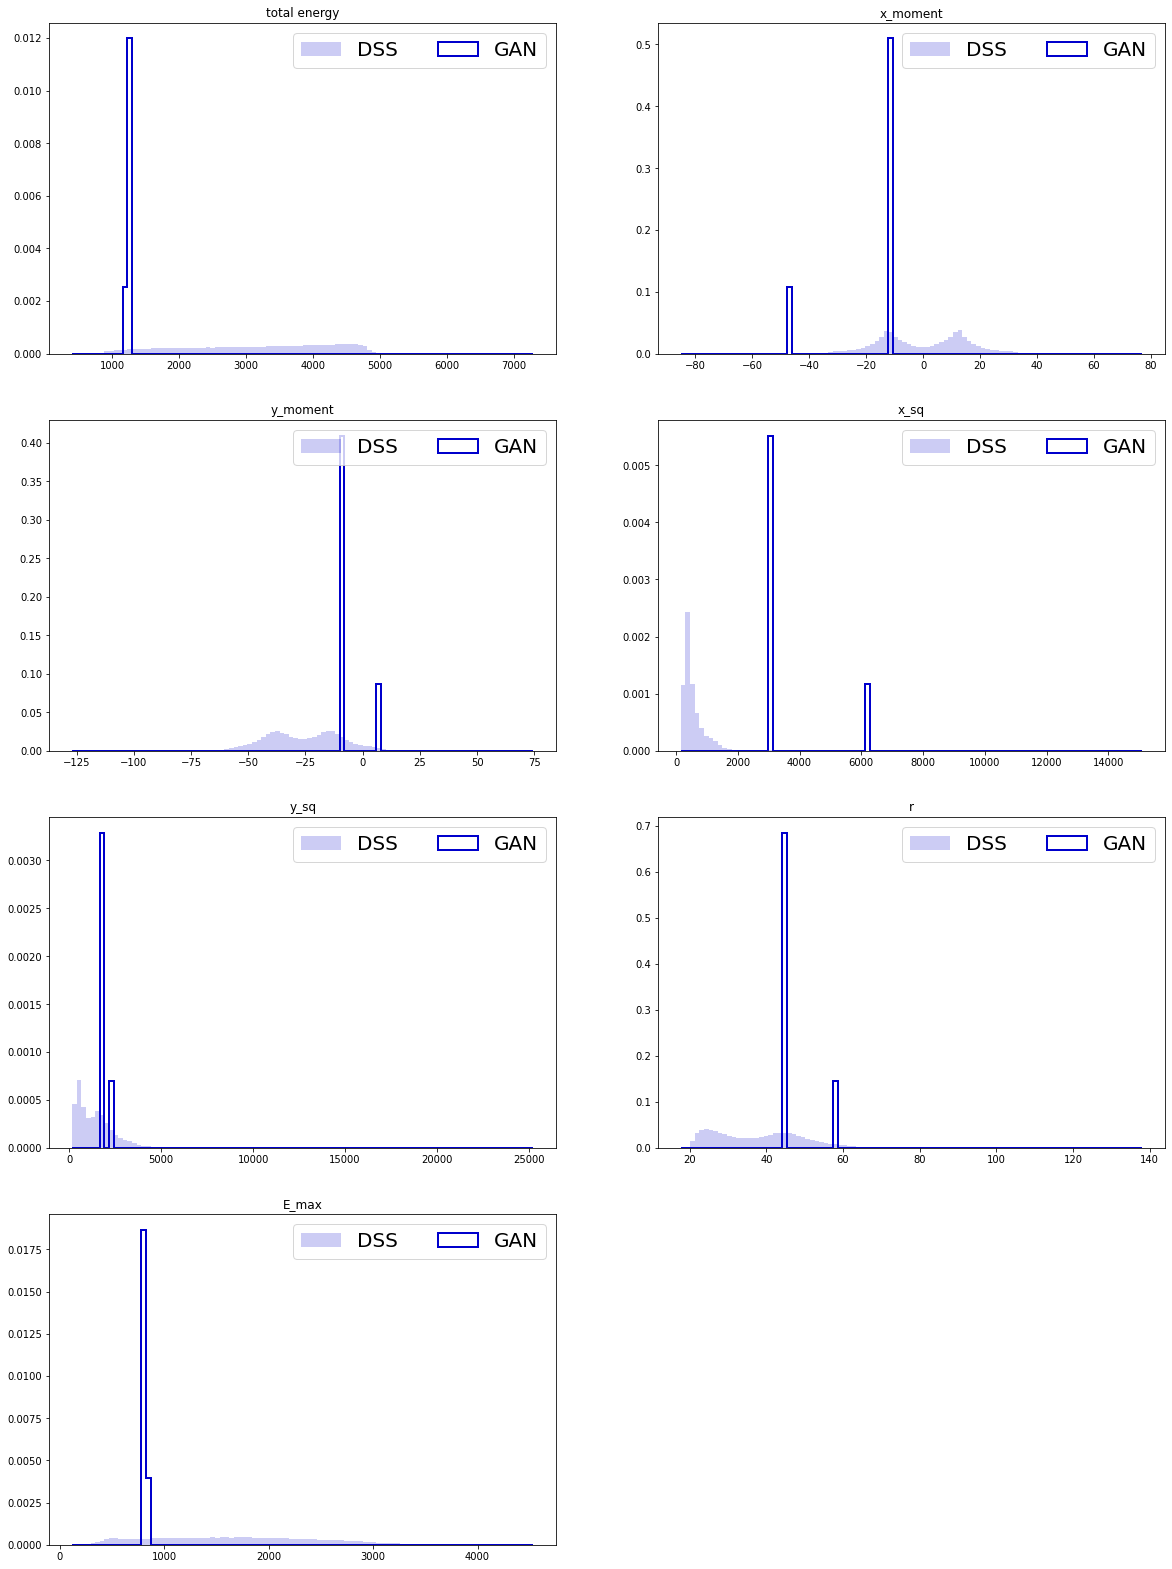

In [201]:
_ = draw_distributions(original, target, folding_weights,y_log_scale=False)

In [202]:
weights_data['folding_weights'] = folding_weights

### Results

original                             0.580728
Gradient Boosted Reweighter          0.227417
Bins-based: total energy             0.505830
Bins-based: total energy and x_sq    0.284286
Folding reweighter                   5.711751
dtype: float64


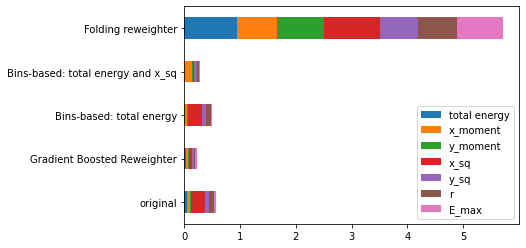

In [203]:
ax = KS_data.plot.barh(stacked=True)
print(KS_data.apply(lambda x:x.sum(),axis =1))

# Save model

In [ ]:
from datetime import datetime
import pytz

tz = pytz.timezone('Asia/Shanghai') #GMT +8
t = datetime.fromtimestamp(int(time.time()),
    pytz.timezone('Asia/Shanghai')).strftime('%Y-%m-%d_%H:%M:%S')
print(t)
#save_type = le.inverse_transform(range(nb_classes))
save_type = list(particle_label.keys())[0]
print("Type :",save_type)
g_model.save_weights('/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/Models/{}LOGANgenerator_{}.hdf5'.format(t,save_type,
                                                                                                                      overwrite=True))
d_model.save_weights('/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/Models/{}LOGANdiscriminator_{}.hdf5'.format(t,save_type,
                                                                                                                      overwrite=True))

2021-07-14_21:47:32
Type : PN_Target_4e5


In [ ]:
tf.__version__

'2.5.0'

# Correlation

In [ ]:
import seaborn as sn

corrMatrix = original.corr()
mask_matrix = np.triu(corrMatrix)

sn.heatmap(corrMatrix, annot=True, cmap="YlGnBu", mask=mask_matrix)
plt.show()

corrMatrix = target.corr()
sn.heatmap(corrMatrix, annot=True, cmap="YlGnBu", mask=mask_matrix)
plt.show()

In [ ]:
sn.pairplot(original,kind="hist")

In [ ]:
sn.pairplot(target,kind="hist")

In [ ]:
original['type'] = 'GAN'
target['type'] = 'DSS'
combined_df = pd.concat([original,target])

In [ ]:
print(len(combined_df))

In [ ]:
#sn.pairplot(combined_df,kind="hist",hue='type')

# Write variables

In [ ]:
def write_hdf5(filenames, **variables):
    with h5py.File(filenames, 'w') as hf:
        for key, item in variables.items():
            hf.create_dataset(key, data=item)

In [ ]:
from datetime import datetime
import pytz

tz = pytz.timezone('Asia/Shanghai') #GMT +8
t = datetime.fromtimestamp(int(time.time()),
    pytz.timezone('Asia/Shanghai')).strftime('%Y-%m-%d_%H:%M:%S')
print(t)
variable_path = '/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/GeneratedVariables/'
variable_file_name  = variable_path + t + '_' + list(particle_label.keys())[0] + 'generated_variables.hdf5'
print(variable_file_name)

2021-07-14_19:32:15
/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/GeneratedVariables/2021-07-14_19:32:15_PN_Target_4e5generated_variables.hdf5


In [ ]:
write_hdf5(variable_file_name, **generated_variables)

# Save ROOT file

In [147]:
!pip install uproot3
!pip install uproot
import uproot3
import uproot
from datetime import datetime
import pytz
import awkward0
tz = pytz.timezone('Asia/Shanghai') #GMT +8
t = datetime.fromtimestamp(int(time.time()),
    pytz.timezone('Asia/Shanghai')).strftime('%Y-%m-%d_%H:%M:%S')
print(t)
root_path = '/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/Generated_ROOT/'
#root_path = '/content/'
output_root_file  = root_path + t + '_' + list(particle_label.keys())[0] + '.root'
print(output_root_file)

2021-07-14_22:38:36
/content/drive/Shareddrives/desmond.z.he1998.HK(CRN.NGO)/Generated_ROOT/2021-07-14_22:38:36_PN_Target_4e5.root


In [148]:
print(np.array(original['r']).shape)
print(test_generated_image.shape)
image_in_root = awkward0.fromiter(
    test_generated_image.reshape((len(test_generated_image),-1))
)

(405838,)
(405838, 20, 20, 1)


In [150]:
out_file = uproot3.recreate(output_root_file,compression=None)
out_file['dp'] = uproot3.newtree({
    'image' : uproot3.newbranch(np.dtype("f8"), size="n"),
    'total_energy': np.float, 
    'x_moment': np.float, 
    'y_moment': np.float, 
    'x_sq': np.float, 
    'y_sq': np.float, 
    'r': np.float, 
    'E_max': np.float,
    'weight': np.float
})

out_file["dp"].extend({
    'image' : image_in_root,
    "n" : image_in_root.counts,
    ############################################
    'total_energy': np.array(original['total energy']), 
    'x_moment': np.array(original['x_moment']), 
    'y_moment': np.array(original['y_moment']), 
    'x_sq': np.array(original['x_sq']), 
    'y_sq': np.array(original['y_sq']), 
    'r': np.array(original['r']), 
    'E_max': np.array(original['E_max']),
    ############################################
    'weight': np.array(weights_data['folding_weights'])
    })
out_file.close()

In [ ]:
variables = [
    'image',
    'total_energy', 
    'x_moment', 
    'y_moment', 
    'x_sq', 
    'y_sq', 
    'r', 
    'E_max',
    #'weight'
            ]
tree_name = 'dp'
events = uproot.open(output_root_file+':'+tree_name) 
data = events.arrays(variables,library="np")
data

In [ ]:
ak_array = ak.to_awkward0(test_generated_image[:5].reshape((len(test_generated_image[:5]),-1)))
print(ak_array)
print(ak_array.counts)

In [ ]:
print(np.array(test_generated_image[:5].reshape((len(test_generated_image[:5]),-1))))
print(np.array(original['total energy'][:5]))

In [ ]:
!pip install awkward
import awkward as ak

# GIF

In [ ]:
def create_gif(image_list, gif_name):  
  
    frames = []  
    for image_name in image_list:  
        frames.append(imageio.imread(image_name))  
    # Save them as frames into a gif   
    imageio.mimsave(gif_name, frames, 'GIF', duration = 0.25)  
  
    return 
def find_all_png():

    png_filenames = glob.glob('2D_image*0[0-2]*.png')
    png_filenames = sorted(png_filenames)
    buf=[]
    for png_file in png_filenames:
        buf.append(png_file)
    return buf

buff = find_all_png()
create_gif(buff,'2D_gif.gif' )